# Setup

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from calendar import month_name
from datetime import datetime
from scipy.stats import linregress

In [164]:
# Load the datasets
facility_a = pd.read_csv('FacilityA_HourlyElectricIntervals.csv')
facility_b = pd.read_csv('FacilityB_HourlyElectricIntervals.csv')
facility_c = pd.read_csv('FacilityC_HourlyElectricIntervals.csv')
gas_water = pd.read_csv('gaswater_energy_used_monthly.csv')
grid_mixes = pd.read_csv('GridMixes.csv')

# Confirm Data is loaded

In [165]:
facility_a.head()

,January,Hour,kWh,MWh,February,Hour.1,kWh.1,MWh.1,March,Hour.2,...,kWh.6,MWh.6,August,Hour.7,kWh.7,MWh.7,September,Hour.8,kWh.8,MWh.8
0,1/1/23,1,"16,028.00",16.03,2/1/23,1.0,"16,203.00",16.203,3/1/23,1.0,...,"14,995.00",15.00,8/1/23,1,"14,833.00",14.83,9/1/23,1.0,"14,868.00",14.87
1,1/1/23,2,"16,161.00",16.16,2/1/23,2.0,"16,164.00",16.164,3/1/23,2.0,...,"14,995.00",15.00,8/1/23,2,"14,826.00",14.83,9/1/23,2.0,"14,868.00",14.87
2,1/1/23,3,"16,203.00",16.20,2/1/23,3.0,"16,155.00",16.155,3/1/23,3.0,...,"14,991.00",14.99,8/1/23,3,"14,813.00",14.81,9/1/23,3.0,"14,865.00",14.87
3,1/1/23,4,"16,181.00",16.18,2/1/23,4.0,"16,135.00",16.135,3/1/23,4.0,...,"14,998.00",15.00,8/1/23,4,"14,748.00",14.75,9/1/23,4.0,"14,829.00",14.83
4,1/1/23,5,"16,132.00",16.13,2/1/23,5.0,"16,074.00",16.074,3/1/23,5.0,...,"14,991.00",14.99,8/1/23,5,"14,719.00",14.72,9/1/23,5.0,"14,800.00",14.80


In [166]:
facility_b.head()

,January,Hour,MWh,February,Hour.1,MWh.1,March,Hour.2,MWh.2,April,...,MWh.5,July,Hour.6,MWh.6,August,Hour.7,MWh.7,September,Hour.8,MWh.8
0,1/1/23,1,61.24,2/1/23,1.0,70.70,3/1/23,1.0,71.17,4/1/23,...,66.29,7/1/23,1,63.37,8/1/23,1,60.70,9/1/23,1.0,61.84
1,1/1/23,2,61.23,2/1/23,2.0,70.86,3/1/23,2.0,71.11,4/1/23,...,66.36,7/1/23,2,63.13,8/1/23,2,59.92,9/1/23,2.0,61.50
2,1/1/23,3,61.47,2/1/23,3.0,70.46,3/1/23,3.0,71.09,4/1/23,...,66.46,7/1/23,3,68.55,8/1/23,3,60.05,9/1/23,3.0,61.25
3,1/1/23,4,61.41,2/1/23,4.0,70.47,3/1/23,4.0,71.47,4/1/23,...,66.16,7/1/23,4,71.64,8/1/23,4,66.51,9/1/23,4.0,61.09
4,1/1/23,5,61.25,2/1/23,5.0,70.23,3/1/23,5.0,71.40,4/1/23,...,66.21,7/1/23,5,71.56,8/1/23,5,69.96,9/1/23,5.0,61.19


In [167]:
facility_c.head()

,January,Hour,MWh,February,Hour.1,MWh.1,March,Hour.2,MWh.2,April,...,MWh.5,July,Hour.6,MWh.6,August,Hour.7,MWh.7,September,Hour.8,MWh.8
0,1/1/23,1,35.67,2/1/23,1.0,36.75,3/1/23,1.0,35.51,4/1/23,...,35.72,7/1/23,1,36.41,8/1/23,1,83.24,9/1/23,1.0,86.45
1,1/1/23,2,35.81,2/1/23,2.0,36.79,3/1/23,2.0,35.76,4/1/23,...,35.70,7/1/23,2,36.90,8/1/23,2,84.28,9/1/23,2.0,86.26
2,1/1/23,3,35.60,2/1/23,3.0,36.68,3/1/23,3.0,35.87,4/1/23,...,35.56,7/1/23,3,37.03,8/1/23,3,84.48,9/1/23,3.0,86.32
3,1/1/23,4,35.90,2/1/23,4.0,36.68,3/1/23,4.0,35.85,4/1/23,...,35.36,7/1/23,4,36.91,8/1/23,4,84.17,9/1/23,4.0,86.30
4,1/1/23,5,35.78,2/1/23,5.0,36.56,3/1/23,5.0,35.89,4/1/23,...,35.57,7/1/23,5,36.89,8/1/23,5,84.23,9/1/23,5.0,86.07


In [168]:
gas_water.head()

,date,facility,water_gallons,naturalgas_therms
0,01-01-2023,FacilityA,724500,293.0
1,01-01-2023,FacilityB,74,3.0
2,01-01-2023,FacilityC,2800,40.0
3,02-01-2023,FacilityA,1597500,297.0
4,02-01-2023,FacilityB,115,5.0


In [169]:
grid_mixes.head()

,zone,January,Nuclear,Coal,Wind,Solar,Hydro,Gas,Oil,Unknown,...,Coal.8,Wind.8,Solar.8,Hydro.8,Gas.8,Oil.8,Unknown.8,fossilFreePercentage.8,renewablePercentage.8,AOER.8
0,ZoneA,2023-01-01 0:00,357,230,0,0,87,664,0,0,...,288.0,0.0,561.0,87.0,1962.0,0.0,8.0,36.0,18.0,299.0
1,ZoneA,2023-01-01 1:00,364,229,0,0,80,682,0,0,...,344.0,0.0,449.0,137.0,1962.0,0.0,5.0,34.0,17.0,313.0
2,ZoneA,2023-01-01 2:00,348,219,0,0,58,657,0,0,...,431.0,0.0,242.0,187.0,1932.0,0.0,5.0,30.0,13.0,341.0
3,ZoneA,2023-01-01 3:00,344,215,0,0,40,639,0,0,...,519.0,0.0,31.0,159.0,1906.0,0.0,6.0,24.0,6.0,379.0
4,ZoneA,2023-01-01 4:00,331,208,0,0,27,604,0,0,...,519.0,0.0,0.0,144.0,1792.0,0.0,5.0,24.0,5.0,385.0


In [170]:
print(grid_mixes.columns)

Index(['zone', 'January', 'Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas',
       'Oil', 'Unknown',
       ...
       'Coal.8', 'Wind.8', 'Solar.8', 'Hydro.8', 'Gas.8', 'Oil.8', 'Unknown.8',
       'fossilFreePercentage.8', 'renewablePercentage.8', 'AOER.8'],
      dtype='object', length=125)


# Reshape data into long formats

In [171]:
# Grid Mixes - collapse monthly sections

num_cols_per_month = 13  

# Split the DataFrame into smaller DataFrames and store them in a list
dfs = []
for i in range(0, len(grid_mixes.columns), num_cols_per_month + 1):  # '+1' to skip the empty column
    # Slice the DataFrame and rename to standard column names
    month_df = grid_mixes.iloc[:, i:i + num_cols_per_month]
    month_df.columns = ['Zone', 'Date', 'Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas', 'Oil', 'Unknown', 'fossilFreePercentage', 'renewablePercentage', 'AOER']
    if not month_df.empty:
        dfs.append(month_df)        

# Concatenate the smaller DataFrames and remove empty rows
grid_mixes_long_df = pd.concat(dfs, ignore_index=True).dropna(how='all')

In [172]:
# write the resulting combined longer dataset to csv
grid_mixes_long_df.to_csv('grid_mixes_long.csv', index=False)

In [173]:
# high level overview of each of the columns in GridMix
grid_mixes_long_df.head()


,Zone,Date,Nuclear,Coal,Wind,Solar,Hydro,Gas,Oil,Unknown,fossilFreePercentage,renewablePercentage,AOER
0,ZoneA,2023-01-01 0:00,357.0,230.0,0.0,0.0,87.0,664.0,0.0,0.0,33.0,7.0,348.0
1,ZoneA,2023-01-01 1:00,364.0,229.0,0.0,0.0,80.0,682.0,0.0,0.0,33.0,6.0,349.0
2,ZoneA,2023-01-01 2:00,348.0,219.0,0.0,0.0,58.0,657.0,0.0,0.0,32.0,5.0,354.0
3,ZoneA,2023-01-01 3:00,344.0,215.0,0.0,0.0,40.0,639.0,0.0,0.0,31.0,3.0,358.0
4,ZoneA,2023-01-01 4:00,331.0,208.0,0.0,0.0,27.0,604.0,0.0,0.0,31.0,2.0,362.0


# Get a sense for Zone A Grid Mix and AOER data

Assumptions
* AOER is an output metric; GrixMix has energy in but not consumption - difficult to changes in AOER are due to changes in mix or consumption until joining to facilities

Questions
* How is the AOER changing over time?  (decreasing = less carbon released per hour)
* How does AOER fluctuate by time of day?
* How does AOER fluctuate by day of month?
* 

Findings:
* There appears to be 3 distinct AOER trends - perhaps change in AOER data collection or methodology around 4/1 and 5/15?
  * Increase in solar beginning in March
  * Nuclear energy dramatically decreased April - mid May (may explain the increase in AOER in that time period)
  * Coal decrease in September drove AOER reduction 
* September 2023 AOER is trending down from previous month (6.6% decrease)
* Energy generated increases around end of May (week of 5/28)



In [174]:
# Aggregate hourly data into daily data - leaving the AOER as an hourly rate

# Convert 'Date' to a daily format
#grid_mixes_long_df.reset_index(inplace=True)
grid_mixes_long_df['Datetime'] = grid_mixes_long_df['Date']
grid_mixes_long_df['Date'] = pd.to_datetime(grid_mixes_long_df['Date']).dt.date

# Group by 'Zone' and 'Date' and then perform the aggregation
daily_grid = grid_mixes_long_df.groupby(['Zone', 'Date']).agg({
    'Nuclear': 'sum',
    'Coal': 'sum',
    'Wind': 'sum',
    'Solar': 'sum',
    'Hydro': 'sum',
    'Gas': 'sum',
    'Oil': 'sum',
    'Unknown': 'sum',
    'AOER': 'mean'
}).reset_index()

# Assuming 'fossilFreePercentage' and 'renewablePercentage' need to be recalculated as daily percentages
# You may need to adjust these calculations based on your specific definitions of 'fossilFree' and 'renewable'
daily_grid['TotalEnergy'] = daily_grid[['Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas', 'Oil', 'Unknown']].sum(axis=1)
daily_grid['fossilFreePercentage'] = (daily_grid[['Wind', 'Solar', 'Hydro','Nuclear']].sum(axis=1)) / daily_grid['TotalEnergy'] * 100
daily_grid['renewablePercentage'] = daily_grid[['Wind', 'Solar', 'Hydro']].sum(axis=1) / daily_grid['TotalEnergy'] * 100

# Calculate the 30-day rolling average of AOER
daily_grid['30d_AOER'] = daily_grid['AOER'].rolling(window=30).mean()

print(daily_grid)


      Zone        Date  Nuclear    Coal  Wind   Solar   Hydro      Gas  Oil  \
0    ZoneA  2023-01-01   8775.0  5589.0   0.0  2051.0   741.0  15406.0  0.0   
1    ZoneA  2023-01-02   7876.0  4849.0   0.0  1960.0   708.0  11376.0  0.0   
2    ZoneA  2023-01-03  12041.0  7114.0   7.0  2495.0  1152.0  18281.0  0.0   
3    ZoneA  2023-01-04  13052.0  7593.0   1.0   574.0  2067.0  22509.0  0.0   
4    ZoneA  2023-01-05  13099.0  7504.0   0.0  3016.0  2804.0  20284.0  0.0   
..     ...         ...      ...     ...   ...     ...     ...      ...  ...   
268  ZoneA  2023-09-26  13728.0  8894.0   0.0  4060.0  1339.0  31998.0  1.0   
269  ZoneA  2023-09-27  13397.0  7914.0   0.0  1575.0  1408.0  29475.0  0.0   
270  ZoneA  2023-09-28  13118.0  7552.0   0.0  1972.0   904.0  26375.0  9.0   
271  ZoneA  2023-09-29  13255.0  7763.0   1.0  4783.0  1149.0  25356.0  0.0   
272  ZoneA  2023-09-30  13288.0  7795.0   9.0  5279.0  1272.0  25930.0  0.0   

     Unknown        AOER  TotalEnergy  fossilFreePe

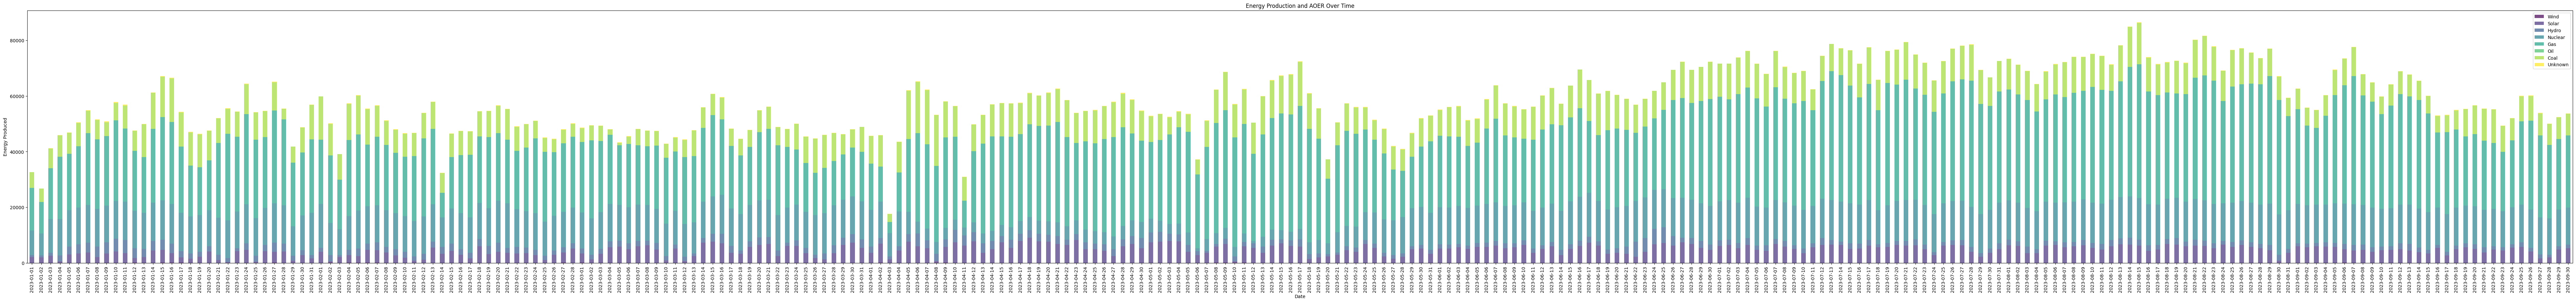

In [106]:
# Look at how the grix mix composition has changed

# Plotting
fig1, ax1 = plt.subplots(figsize=(100, 10))

# Stacked bar chart for energy sources
daily_grid.plot(kind='bar', x='Date', stacked=True, 
                        y=['Wind', 'Solar', 'Hydro', 'Nuclear', 'Gas', 'Oil', 'Coal', 'Unknown'], 
                        ax=ax1, colormap='viridis', alpha=0.7)

# Labels and Title
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Produced')
plt.title('Energy Production and AOER Over Time')

plt.show()



In [107]:
# total energy produced seems to have increased when looking at daily viewed
# let's rollup to weeky and then generate a chart to show renewable vs non-renewable and fossil fuels vs non-ff

# Convert 'Date' to a daily format
grid_mixes_long_df.reset_index(inplace=True)
grid_mixes_long_df['Month'] = pd.to_datetime(grid_mixes_long_df['Date']).dt.month

# Group by 'Zone' and 'Date' and then perform the aggregation
weeklyy_grid = grid_mixes_long_df.groupby(['Zone', 'Date']).agg({
    'Nuclear': 'sum',
    'Coal': 'sum',
    'Wind': 'sum',
    'Solar': 'sum',
    'Hydro': 'sum',
    'Gas': 'sum',
    'Oil': 'sum',
    'Unknown': 'sum',
    'AOER': 'mean'
}).reset_index()

# Assuming 'fossilFreePercentage' and 'renewablePercentage' need to be recalculated as daily percentages
# You may need to adjust these calculations based on your specific definitions of 'fossilFree' and 'renewable'
daily_grid['TotalEnergy'] = daily_grid[['Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas', 'Oil', 'Unknown']].sum(axis=1)
daily_grid['fossilFreePercentage'] = (daily_grid[['Wind', 'Solar', 'Hydro','Nuclear']].sum(axis=1)) / daily_grid['TotalEnergy'] * 100
daily_grid['renewablePercentage'] = daily_grid[['Wind', 'Solar', 'Hydro']].sum(axis=1) / daily_grid['TotalEnergy'] * 100

# Calculate the 30-day rolling average of AOER
daily_grid['30d_AOER'] = daily_grid['AOER'].rolling(window=30).mean()

print(daily_grid)

      Zone        Date  Nuclear    Coal  Wind   Solar   Hydro      Gas  Oil  \
0    ZoneA  2023-01-01   8775.0  5589.0   0.0  2051.0   741.0  15406.0  0.0   
1    ZoneA  2023-01-02   7876.0  4849.0   0.0  1960.0   708.0  11376.0  0.0   
2    ZoneA  2023-01-03  12041.0  7114.0   7.0  2495.0  1152.0  18281.0  0.0   
3    ZoneA  2023-01-04  13052.0  7593.0   1.0   574.0  2067.0  22509.0  0.0   
4    ZoneA  2023-01-05  13099.0  7504.0   0.0  3016.0  2804.0  20284.0  0.0   
..     ...         ...      ...     ...   ...     ...     ...      ...  ...   
268  ZoneA  2023-09-26  13728.0  8894.0   0.0  4060.0  1339.0  31998.0  1.0   
269  ZoneA  2023-09-27  13397.0  7914.0   0.0  1575.0  1408.0  29475.0  0.0   
270  ZoneA  2023-09-28  13118.0  7552.0   0.0  1972.0   904.0  26375.0  9.0   
271  ZoneA  2023-09-29  13255.0  7763.0   1.0  4783.0  1149.0  25356.0  0.0   
272  ZoneA  2023-09-30  13288.0  7795.0   9.0  5279.0  1272.0  25930.0  0.0   

     Unknown        AOER  TotalEnergy  fossilFreePe

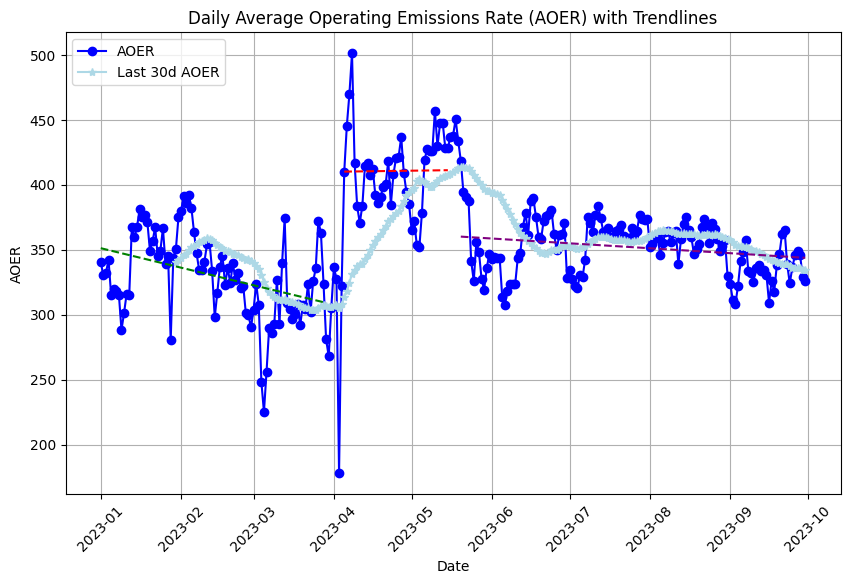

In [108]:
# Plot daily averaged AOER, a 30day rolling AOER and trendines to show how AOER is changing over time
#daily_grid.reset_index(inplace=True)
daily_grid['Date'] = pd.to_datetime(daily_grid['Date']).dt.date

# Sample data for demonstration purposes
# Replace this with your actual 'daily_grid' DataFrame
period1_dt = pd.date_range(start="2023-01-01", end="2023-04-30")

# Separate the data into two periods
period1 = daily_grid[(daily_grid['Date'] >= datetime(2023, 1, 1).date()) & (daily_grid['Date'] <= datetime(2023, 3, 28).date())]
period2 = daily_grid[(daily_grid['Date'] >= datetime(2023, 4, 5).date()) & (daily_grid['Date'] <= datetime(2023, 5, 15).date())]
period3 = daily_grid[(daily_grid['Date'] >= datetime(2023, 5, 20).date()) & (daily_grid['Date'] <= datetime(2023, 9, 30).date())]

# Plotting AOER in a separate chart
plt.figure(figsize=(10, 6))
plt.plot(daily_grid['Date'], daily_grid['AOER'], marker='o', color='blue', label="AOER")
plt.plot(daily_grid['Date'], daily_grid['30d_AOER'], marker='*', color='lightblue', label='Last 30d AOER')
plt.xlabel('Date')
plt.ylabel('AOER')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.grid(True)

# Function to add a trendline
def add_trendline(data, color):
    z = np.polyfit(data.index, data['AOER'], 1)
    p = np.poly1d(z)
    plt.plot(data['Date'], p(data.index), linestyle="--", color=color)

# Plotting AOER with trendlines
add_trendline(period1, 'green')  # Trendline for period 1
add_trendline(period2, 'red')   # Trendline for period 2
add_trendline(period3, 'purple')   # Trendline for period 2

plt.title('Daily Average Operating Emissions Rate (AOER) with Trendlines')
plt.legend(loc='upper left')
plt.show()




In [109]:
# Ensure 'Date' is in the correct datetime format
daily_grid.reset_index(inplace=True)

daily_grid['Date'] = pd.to_datetime(daily_grid['Date'])

# Set 'Date' as the index
daily_grid.set_index('Date', inplace=True)

# Group by month and calculate the mean AOER
monthly_aoer = daily_grid['AOER'].resample('M').mean()

# Calculate the month-over-month change in AOER
monthly_aoer_diff = monthly_aoer.diff()
monthly_aoer_pct_change = monthly_aoer.pct_change() * 100


# Combine mean AOER and month-over-month change into a single DataFrame
monthly_comparison = pd.DataFrame({'Monthly_AOER': monthly_aoer, 
                                   'MoM_Change': monthly_aoer_diff,
                                  'MoM_Change_Pct': monthly_aoer_pct_change})

# Reset the index to bring 'Date' back as a column
monthly_comparison.reset_index(inplace=True)

print(monthly_comparison)


        Date  Monthly_AOER  MoM_Change  MoM_Change_Pct
0 2023-01-31    341.969086         NaN             NaN
1 2023-02-28    339.575893   -2.393193       -0.699827
2 2023-03-31    306.133707  -33.442186       -9.848221
3 2023-04-30    394.787500   88.653793       28.959174
4 2023-05-31    393.901882   -0.885618       -0.224328
5 2023-06-30    353.191667  -40.710215      -10.335116
6 2023-07-31    359.116935    5.925269        1.677636
7 2023-08-31    358.182796   -0.934140       -0.260121
8 2023-09-30    334.541667  -23.641129       -6.600297


## Facilities EDA

Let's start to see what the hour energy used in facilities looks like

In [110]:
# Ensure 'Date' is in the correct datetime format
daily_grid.reset_index(inplace=True)
daily_grid['Date'] = pd.to_datetime(daily_grid['Date'])

# Set 'Date' as the index
daily_grid.set_index('Date', inplace=True)

# Group by week and aggregate
# AOER is averaged, energy columns are summed
weekly_grid = daily_grid.resample('W').agg({
    'Nuclear': 'sum',
    'Coal': 'sum',
    'Wind': 'sum',
    'Solar': 'sum',
    'Hydro': 'sum',
    'Gas': 'sum',
    'Oil': 'sum',
    'Unknown': 'sum',
    'AOER': 'mean'
}).reset_index()

# Assuming 'fossilFreePercentage' and 'renewablePercentage' need to be recalculated as daily percentages
# You may need to adjust these calculations based on your specific definitions of 'fossilFree' and 'renewable'
weekly_grid['TotalEnergy'] = weekly_grid[['Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas', 'Oil', 'Unknown']].sum(axis=1)
weekly_grid['fossilFreePercentage'] = (weekly_grid[['Wind', 'Solar', 'Hydro','Nuclear']].sum(axis=1)) / weekly_grid['TotalEnergy'] * 100
weekly_grid['renewablePercentage'] = weekly_grid[['Wind', 'Solar', 'Hydro']].sum(axis=1) / weekly_grid['TotalEnergy'] * 100

# Calculate the 28-day rolling average of AOER
daily_grid['28d_AOER'] = weekly_grid['AOER'].rolling(window=30).mean()

print(weekly_grid)


         Date   Nuclear      Coal  Wind    Solar    Hydro       Gas   Oil  \
0  2023-01-01    8775.0    5589.0   0.0   2051.0    741.0   15406.0   0.0   
1  2023-01-08   86462.0   50398.0   8.0  17178.0  17350.0  145196.0   0.0   
2  2023-01-15   94996.0   65938.0  64.0  23890.0  26765.0  178407.0   2.0   
3  2023-01-22   94242.0   80180.0  60.0  14464.0  14682.0  164659.0   0.0   
4  2023-01-29   92622.0   58488.0  29.0  22212.0  15823.0  200069.0   1.0   
5  2023-02-05   90257.0   84415.0  55.0  15985.0  11971.0  168989.0   0.0   
6  2023-02-12   91984.0   66445.0  46.0  19184.0  15234.0  164612.0   0.0   
7  2023-02-19   88984.0   60332.0  28.0  26721.0  16656.0  147453.0   1.0   
8  2023-02-26   95376.0   53543.0  14.0  21056.0  14694.0  166039.0   1.0   
9  2023-03-05   91190.0   28022.0  61.0  28122.0  13229.0  175433.0   2.0   
10 2023-03-12   86905.0   35474.0  32.0  28741.0  12353.0  156840.0   1.0   
11 2023-03-19   91459.0   49727.0  22.0  36880.0  14507.0  171276.0   0.0   

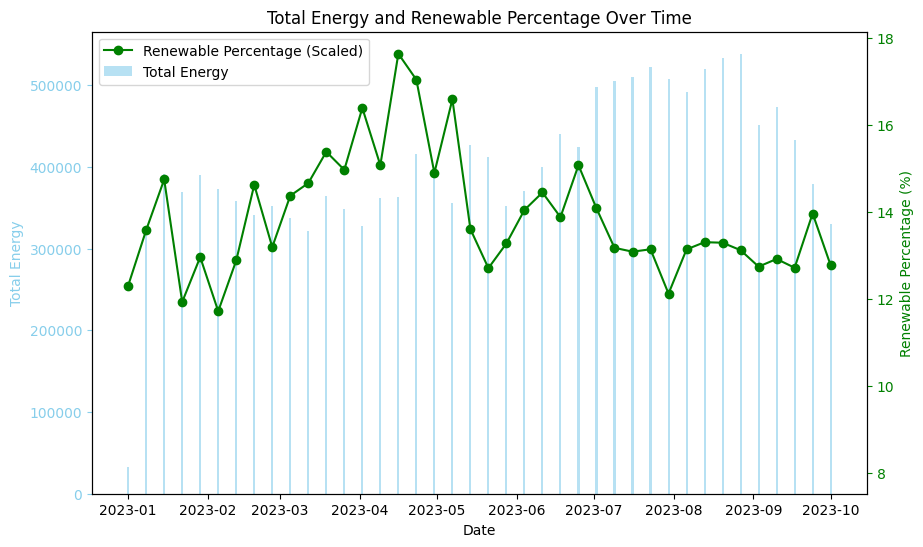

In [111]:
# Set 'Date' as the index
weekly_grid.reset_index(inplace=True)
weekly_grid.set_index('Date', inplace=True)

# Assuming weekly_grid is your DataFrame

# Scale factor - this is a trial-and-error process
scale_factor = max(weekly_grid['TotalEnergy']) / max(weekly_grid['renewablePercentage'])

# Scale the renewablePercentage
weekly_grid['scaled_renewablePercentage'] = weekly_grid['renewablePercentage'] * scale_factor

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for TotalEnergy
ax1.bar(weekly_grid.index, weekly_grid['TotalEnergy'], color='skyblue', alpha=0.6, label='Total Energy')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Energy', color='skyblue')
ax1.tick_params(axis='y', colors='skyblue')

# Line chart for Scaled Renewable Percentage on the same axis
ax1.plot(weekly_grid.index, weekly_grid['scaled_renewablePercentage'], color='green', marker='o', label='Renewable Percentage (Scaled)')

# Create a secondary y-axis for the original renewablePercentage values
ax2 = ax1.twinx()
ax2.set_ylim([min(weekly_grid['renewablePercentage']), max(weekly_grid['renewablePercentage'])])
ax2.set_ylabel('Renewable Percentage (%)', color='green')
ax2.tick_params(axis='y', colors='green')

# Title and legend
plt.title('Total Energy and Renewable Percentage Over Time')
ax1.legend(loc='upper left')

plt.show()

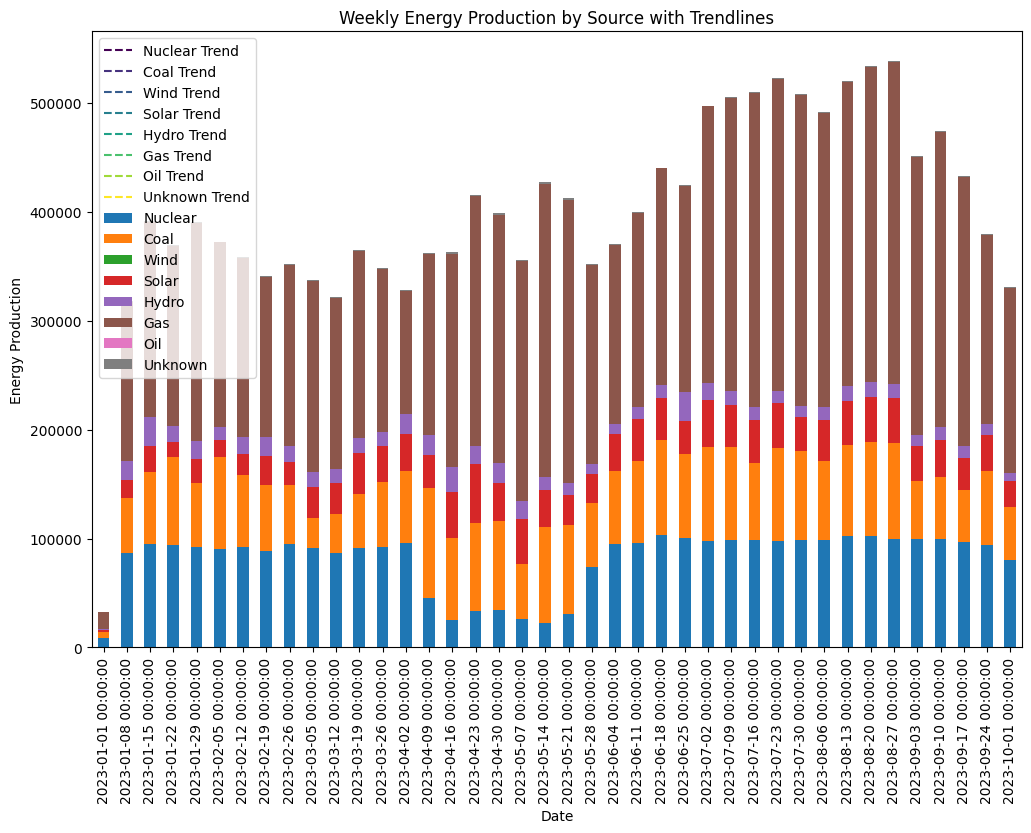

In [112]:
# Sample DataFrame setup for demonstration purposes
# Replace this with your actual 'weekly_grid' DataFrame
# Setting Date as the index
weekly_grid.reset_index(inplace=True)
weekly_grid.set_index('Date', inplace=True)

energy_sources = ['Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas', 'Oil', 'Unknown']

# Plotting
plt.figure(figsize=(12, 8))

# Stacked bar chart for the specified energy sources
weekly_grid[energy_sources].plot(kind='bar', stacked=True, ax=plt.gca())

# Adding trendlines for each energy source
trend_colors = plt.cm.viridis(np.linspace(0, 1, len(energy_sources)))  # Generate distinct colors
for i, source in enumerate(energy_sources):
    z = np.polyfit(range(len(weekly_grid)), weekly_grid[source], 1)
    p = np.poly1d(z)
    plt.plot(weekly_grid.index, p(range(len(weekly_grid))), linestyle="--", color=trend_colors[i], label=f'{source} Trend')

plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.title('Weekly Energy Production by Source with Trendlines')
plt.legend()
plt.show()



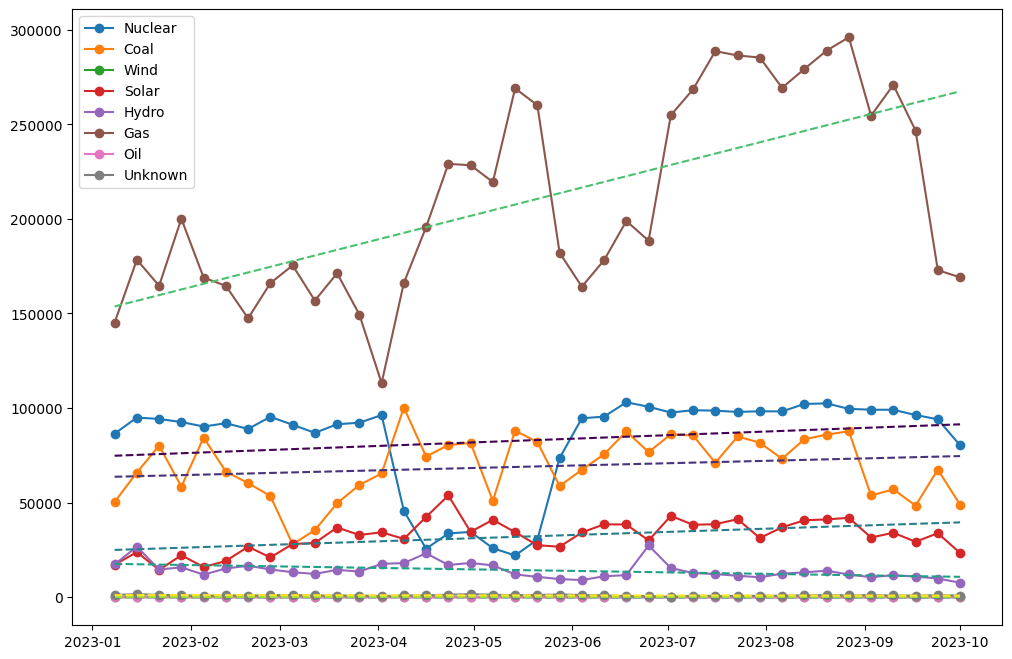

In [113]:
# Replace this with your actual 'weekly_grid' DataFrame
# Setting Date as the index
weekly_grid.reset_index(inplace=True)
weekly_grid.set_index('Date', inplace=True)

# start from 1/2 since data on 1/1 is anomolous, messing up trend lines
weekly_grid = weekly_grid[weekly_grid.index >= pd.Timestamp('2023-01-02')]

# Plotting
plt.figure(figsize=(12, 8))

for source in energy_sources:
    plt.plot(weekly_grid.index, weekly_grid[source], label=source, marker='o')

# Adding trendlines for each energy source
trend_colors = plt.cm.viridis(np.linspace(0, 1, len(energy_sources)))  # Generate distinct colors
for i, source in enumerate(energy_sources):
    z = np.polyfit(range(len(weekly_grid)), weekly_grid[source], 1)
    p = np.poly1d(z)
    plt.plot(weekly_grid.index, p(range(len(weekly_grid))), linestyle="--", color=trend_colors[i])

plt.legend()
plt.show()

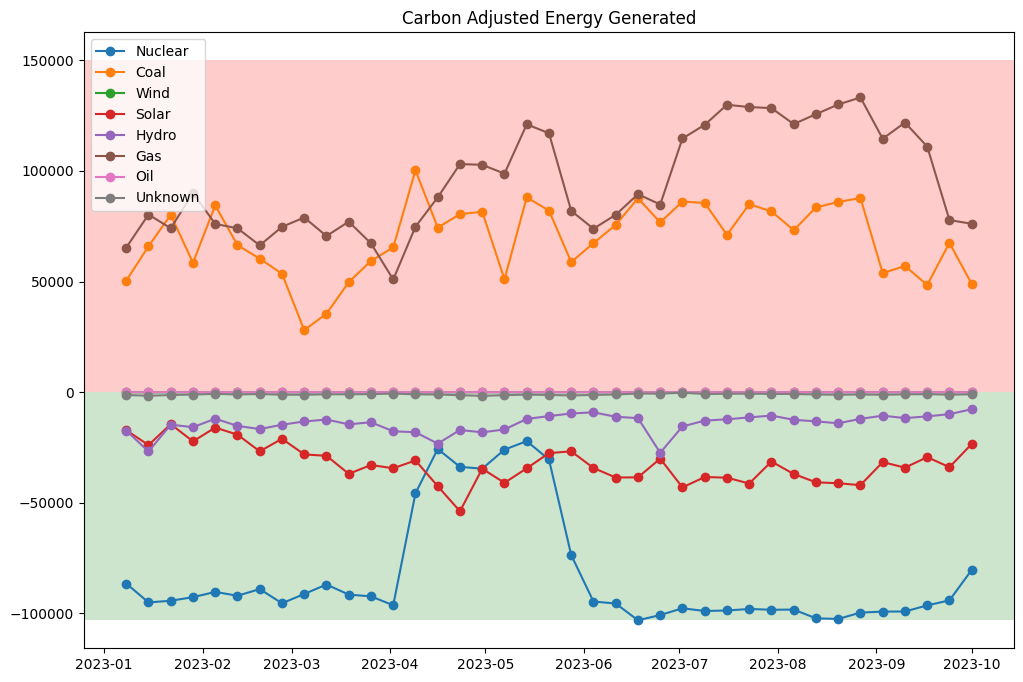

In [114]:
# to better visualize energy generated that would have increase vs decrease carbon split across the y-axis
# add in multiplier to get a better sense for impact on AOER

# Replace this with your actual 'weekly_grid' DataFrame
# Setting Date as the index
weekly_grid.reset_index(inplace=True)
weekly_grid.set_index('Date', inplace=True)

# start from 1/2 since data on 1/1 is anomolous, messing up trend lines
weekly_grid_adj = weekly_grid[weekly_grid.index >= pd.Timestamp('2023-01-02')]

# Multiply carbon-free sources by -1 to represent their non-emitting status
carbon_emitting_sources = ['Coal', 'Gas', 'Oil']
carbon_free_sources = ['Nuclear', 'Wind', 'Solar', 'Hydro', 'Unknown']  # Assuming 'Unknown' is carbon-free for this example
for source in carbon_free_sources:
    weekly_grid_adj[source] *= -1

weekly_grid_adj['Oil'] *= .8
weekly_grid_adj['Gas'] *= .45

# Plotting
plt.figure(figsize=(12, 8))

for source in energy_sources:
    plt.plot(weekly_grid_adj.index, weekly_grid_adj[source], label=source, marker='o')

# Create a color background for positive and negative y-axis
plt.axhspan(0, 150000, facecolor='red', alpha=0.2)
plt.axhspan(min(weekly_grid_adj.min()), 0, facecolor='green', alpha=0.2)

# Adding trendlines for each energy source
# trend_colors = plt.cm.viridis(np.linspace(0, 1, len(energy_sources)))  # Generate distinct colors
# for i, source in enumerate(energy_sources):
#    z = np.polyfit(range(len(weekly_grid)), weekly_grid[source], 1)
#    p = np.poly1d(z)
#    plt.plot(weekly_grid.index, p(range(len(weekly_grid))), linestyle="--", color=trend_colors[i])

plt.gca().autoscale(axis='y')
plt.title("Carbon Adjusted Energy Generated")
plt.legend()
plt.show()

# Reshape Facilities data for analysis

In [115]:
# Facilities A - collapse monthly sections

num_cols_per_month_f = 4  

# Split the DataFrame into smaller DataFrames and store them in a list
fa_dfs = []
for i in range(0, len(facility_a.columns), num_cols_per_month_f): 
    # Slice the DataFrame and rename to standard column names
    f_month_df = facility_a.iloc[:, i:i + num_cols_per_month_f]
    f_month_df.columns = ['Date', 'Hour', 'kWh', 'MWh']
    if not f_month_df.empty:
        fa_dfs.append(f_month_df)        

# Concatenate the smaller DataFrames and remove empty rows
fa_long_df = pd.concat(fa_dfs, ignore_index=True).dropna(how='all')

In [116]:
fa_long_df.tail()

,Date,Hour,kWh,MWh
6667,9/30/23,20.0,"15,134.00",15.13
6668,9/30/23,21.0,"15,170.00",15.17
6669,9/30/23,22.0,"15,251.00",15.25
6670,9/30/23,23.0,"15,270.00",15.27
6671,9/30/23,24.0,"15,222.00",15.22


In [117]:
fa_long_df.to_csv('facility_a_long.csv', index=False)

In [193]:
fa_long_df.describe()

,index,Hour,MWh
count,6551.000000,6551.000000,6551.000000
mean,3353.649367,12.501450,14.447190
std,1932.386885,6.922248,3.113942
min,0.000000,1.000000,0.023000
25%,1709.500000,7.000000,14.720000
50%,3372.000000,13.000000,14.990000
75%,5033.500000,18.500000,15.458000
max,6671.000000,24.000000,17.480000


In [118]:
# Facilities B - collapse monthly sections

num_cols_per_month_f = 3  

# Split the DataFrame into smaller DataFrames and store them in a list
fb_dfs = []
for i in range(0, len(facility_b.columns), num_cols_per_month_f): 
    # Slice the DataFrame and rename to standard column names
    f_month_df = facility_b.iloc[:, i:i + num_cols_per_month_f]
    f_month_df.columns = ['Date', 'Hour', 'MWh']
    if not f_month_df.empty:
        fb_dfs.append(f_month_df)        

# Concatenate the smaller DataFrames and remove empty rows
fb_long_df = pd.concat(fb_dfs, ignore_index=True).dropna(how='all')
fb_long_df['kWh'] = fb_long_df['MWh']*1000

In [119]:
fb_long_df.describe()

,Hour,MWh,kWh
count,6551.000000,6551.000000,6551.000000
mean,12.501450,67.307971,67307.971302
std,6.922248,5.400839,5400.838571
min,1.000000,0.210000,210.000000
25%,7.000000,64.620000,64620.000000
50%,13.000000,68.560000,68560.000000
75%,18.500000,70.920000,70920.000000
max,24.000000,75.010000,75010.000000


In [120]:
fb_long_df.to_csv('facility_b_long.csv', index=False)

In [121]:
# Facilities C - collapse monthly sections

num_cols_per_month_f = 3  

# Split the DataFrame into smaller DataFrames and store them in a list
fc_dfs = []
for i in range(0, len(facility_c.columns), num_cols_per_month_f): 
    # Slice the DataFrame and rename to standard column names
    f_month_df = facility_c.iloc[:, i:i + num_cols_per_month_f]
    f_month_df.columns = ['Date', 'Hour', 'MWh']
    if not f_month_df.empty:
        fc_dfs.append(f_month_df)        

# Concatenate the smaller DataFrames and remove empty rows
fc_long_df = pd.concat(fc_dfs, ignore_index=True).dropna(how='all')
fc_long_df['kWh'] = fc_long_df['MWh']*1000

In [122]:
fc_long_df.to_csv('facility_c_long.csv', index=False)

In [123]:
fc_long_df.describe()

,Hour,MWh,kWh
count,6551.000000,6551.000000,6551.000000
mean,12.501450,50.927883,50927.882766
std,6.922248,22.692279,22692.279307
min,1.000000,4.490000,4490.000000
25%,7.000000,35.690000,35690.000000
50%,13.000000,36.500000,36500.000000
75%,18.500000,83.755000,83755.000000
max,24.000000,92.430000,92430.000000


# Compare the Energy Consumed 

Assumptions


Questions

Findings
* Overall energy usage is extremely different at each facility 
  * Facility A's energy is the lowest and the most consistent.  
  * Facility B and C have similar levels of usage but B is within a narrower range, but with a lot of sporadic low usage.  
  * A usage is spread out.
* Weekly usage is consistent for A and B; Spiked (over 200% increase) in July for C


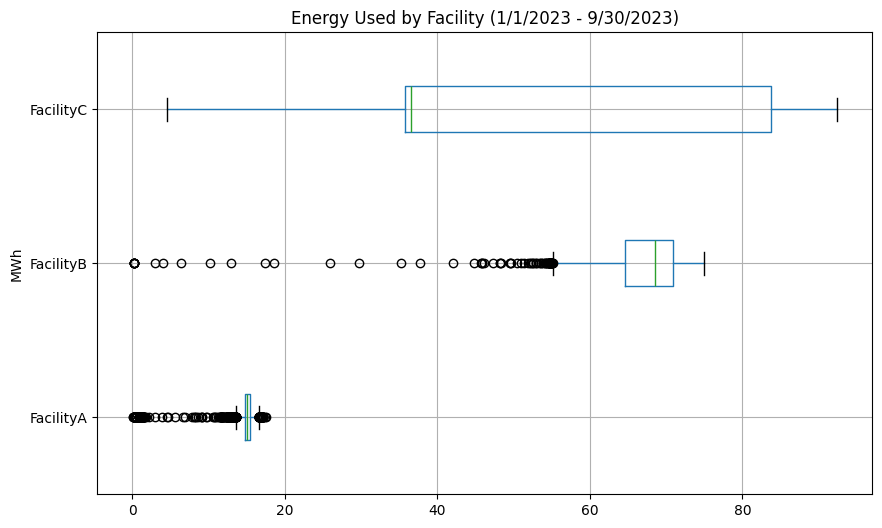

In [124]:
# energy used in the full time period (compare faciliaties)
# Combine data from all facilities into a single DataFrame for plotting
combined_data = pd.DataFrame({
    'FacilityA': fa_long_df['MWh'],
    'FacilityB': fb_long_df['MWh'],
    'FacilityC': fc_long_df['MWh']
})

# Plotting
plt.figure(figsize=(10, 6))
combined_data.boxplot(vert=False)
plt.title('Energy Used by Facility (1/1/2023 - 9/30/2023)')
plt.ylabel('MWh')
plt.show()


In [125]:
# lets look at usage over time aggregated by week

# Ensure 'Date' is in the correct datetime format
fa_long_df.reset_index(inplace=True)
fa_long_df['Date'] = pd.to_datetime(fa_long_df['Date'])

# Set 'Date' as the index
fa_long_df.set_index('Date', inplace=True)

# Group by week and aggregate
# AOER is averaged, energy columns are summed
a_weekly = fa_long_df.resample('W').agg({
    'MWh': 'sum',
}).reset_index()

a_weekly.head()

,Date,MWh
0,2023-01-01,388.96
1,2023-01-08,2648.34
2,2023-01-15,2153.88
3,2023-01-22,2637.59
4,2023-01-29,2610.96


In [126]:
# lets look at usage over time aggregated by week

# Ensure 'Date' is in the correct datetime format
fb_long_df.reset_index(inplace=True)
fb_long_df['Date'] = pd.to_datetime(fb_long_df['Date'])

# Set 'Date' as the index
fb_long_df.set_index('Date', inplace=True)

# Group by week and aggregate
# AOER is averaged, energy columns are summed
b_weekly = fb_long_df.resample('W').agg({
    'MWh': 'sum',
}).reset_index()

b_weekly.head()

,Date,MWh
0,2023-01-01,1469.98
1,2023-01-08,10216.85
2,2023-01-15,11214.62
3,2023-01-22,11238.00
4,2023-01-29,11742.74


In [127]:
# lets look at usage over time aggregated by week

# Ensure 'Date' is in the correct datetime format
fc_long_df.reset_index(inplace=True)
fc_long_df['Date'] = pd.to_datetime(fc_long_df['Date'])

# Set 'Date' as the index
fc_long_df.set_index('Date', inplace=True)

# Group by week and aggregate
# AOER is averaged, energy columns are summed
c_weekly = fc_long_df.resample('W').agg({
    'MWh': 'sum',
}).reset_index()

c_weekly.head()

,Date,MWh
0,2023-01-01,857.59
1,2023-01-08,5935.07
2,2023-01-15,6049.84
3,2023-01-22,5934.98
4,2023-01-29,6057.20


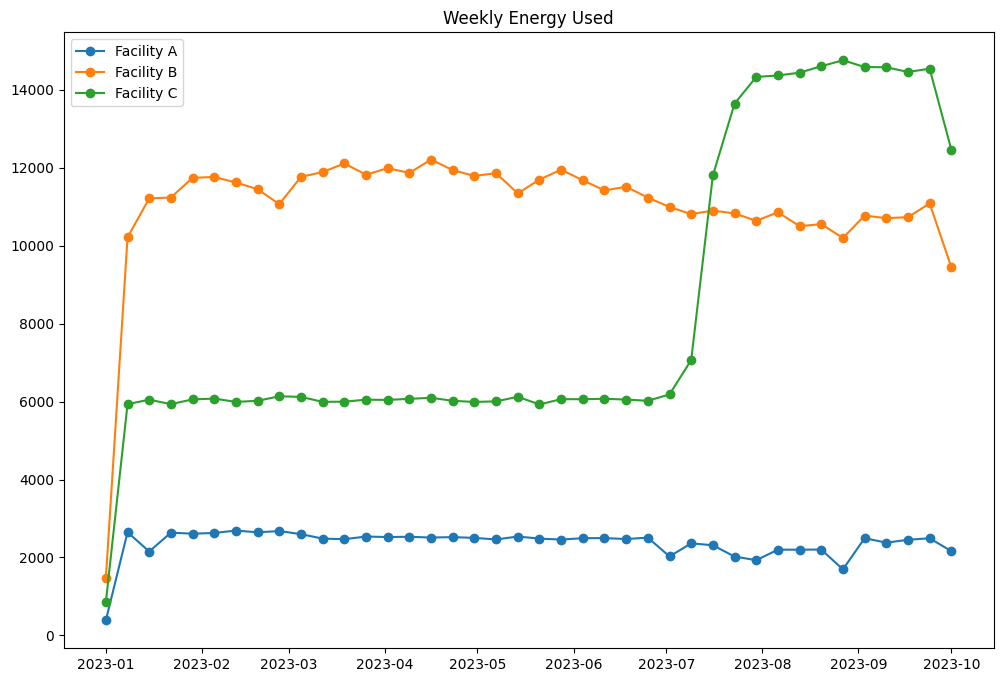

In [128]:
# plot weekly 
plt.figure(figsize=(12, 8))

# Setting 'Date' as the index
a_weekly.set_index('Date', inplace=True)
b_weekly.set_index('Date', inplace=True)
c_weekly.set_index('Date', inplace=True)

plt.plot(a_weekly['MWh'], label="Facility A", marker='o')
plt.plot(b_weekly['MWh'], label="Facility B", marker='o')
plt.plot(c_weekly['MWh'], label="Facility C", marker='o')

# Adding trendlines for each energy source
# trend_colors = plt.cm.viridis(np.linspace(0, 1, len(energy_sources)))  # Generate distinct colors
# for i, source in enumerate(energy_sources):
#    z = np.polyfit(range(len(weekly_grid)), weekly_grid[source], 1)
#    p = np.poly1d(z)
#    plt.plot(weekly_grid.index, p(range(len(weekly_grid))), linestyle="--", color=trend_colors[i])

plt.title("Weekly Energy Used")
plt.legend()

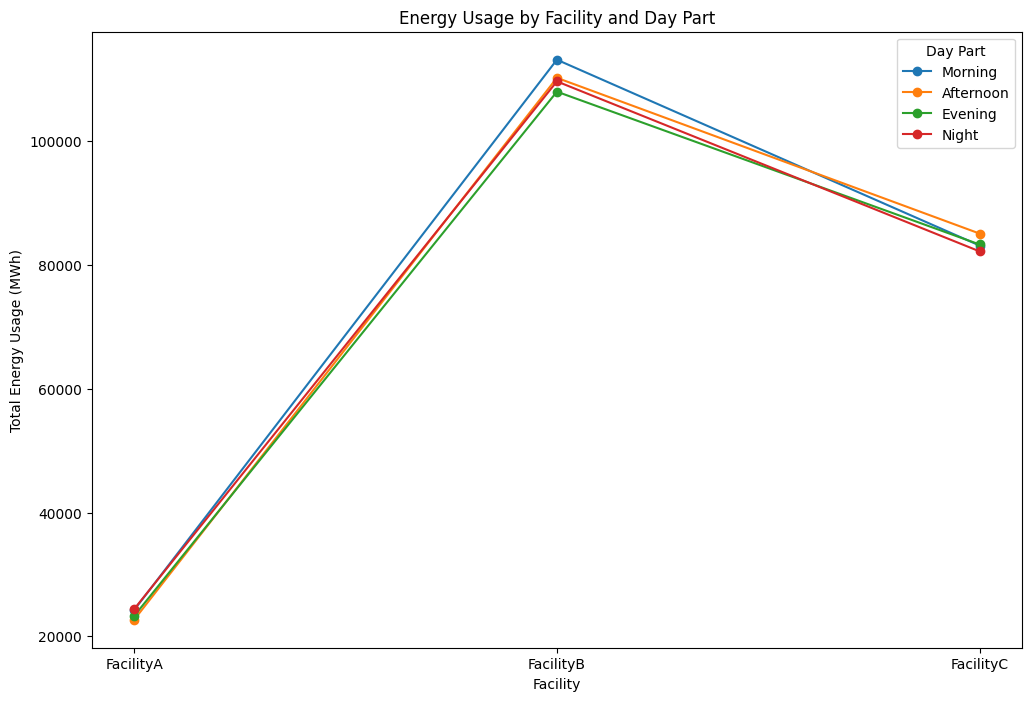

In [129]:
# let's see if there are any trends based on day-parts (morning, evening, etc.)
# Function to label day parts
fa_long_df.reset_index(inplace=True)
fb_long_df.reset_index(inplace=True)
fc_long_df.reset_index(inplace=True)

def label_day_part(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Label day parts in each DataFrame
for df in [fa_long_df, fb_long_df, fc_long_df]:
    df['DayPart'] = df['Hour'].apply(label_day_part)
    df.set_index('Date', inplace=True)

# Aggregate data for each day part
def aggregate_day_parts(df):
    return df.groupby('DayPart')['MWh'].sum()

agg_a = aggregate_day_parts(fa_long_df)
agg_b = aggregate_day_parts(fb_long_df)
agg_c = aggregate_day_parts(fc_long_df)

# Plotting line charts for each day part
day_parts = ['Morning', 'Afternoon', 'Evening', 'Night']

plt.figure(figsize=(12, 8))
for part in day_parts:
    plt.plot(['FacilityA', 'FacilityB', 'FacilityC'], [agg_a.loc[part], agg_b.loc[part], agg_c.loc[part]], label=part, marker='o')

plt.xlabel('Facility')
plt.ylabel('Total Energy Usage (MWh)')
plt.title('Energy Usage by Facility and Day Part')
plt.legend(title='Day Part')
plt.show()

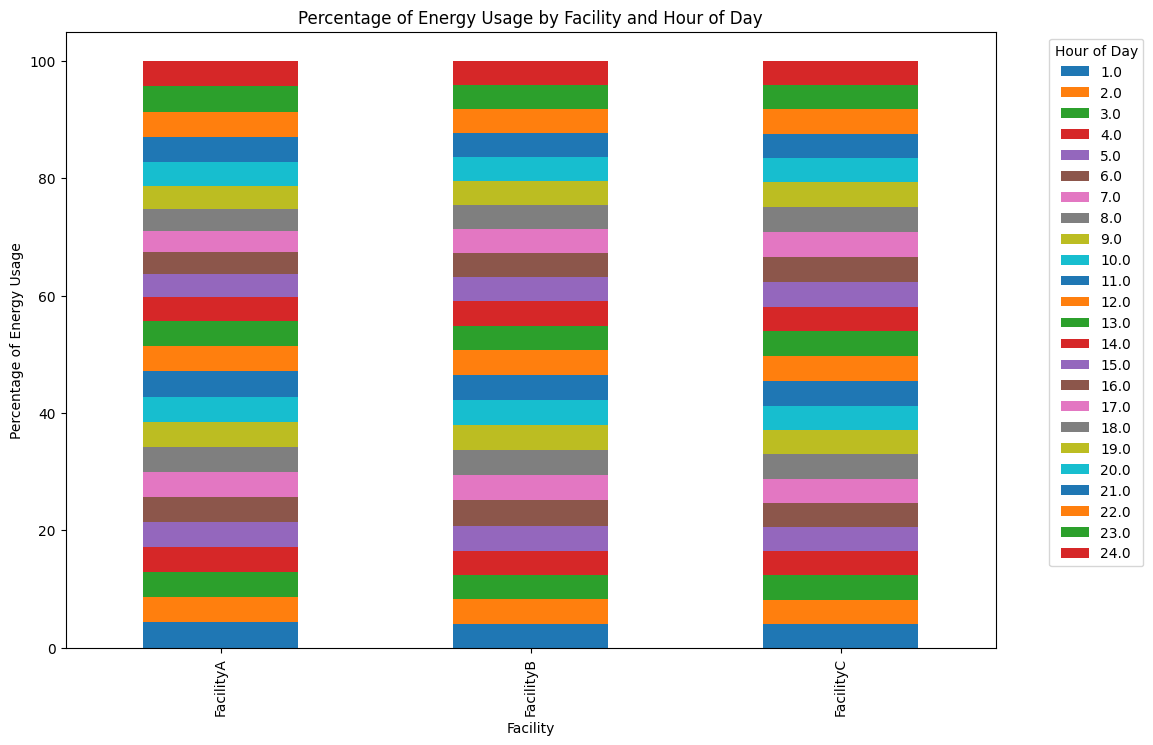

In [130]:
# Combine the data into one DataFrame
fa_long_df['Facility'] = 'FacilityA'
fb_long_df['Facility'] = 'FacilityB'
fc_long_df['Facility'] = 'FacilityC'
combined_data = pd.concat([fa_long_df, fb_long_df, fc_long_df])

# Pivot the data for the stacked bar chart
pivot_data = combined_data.pivot_table(index='Facility', columns='Hour', values='MWh', aggfunc='mean')

# Normalize the data to get the percentage
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plotting
pivot_data_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Facility')
plt.ylabel('Percentage of Energy Usage')
plt.title('Percentage of Energy Usage by Facility and Hour of Day')
plt.legend(title='Hour of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/sl/w_zvvxs11rs1k9qdjf6zsqk40000gr/T/ipykernel_52445/2665969470.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fa_avg = fa_long_df.groupby(fa_long_df['Hour']).mean()
/var/folders/sl/w_zvvxs11rs1k9qdjf6zsqk40000gr/T/ipykernel_52445/2665969470.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fb_avg = fb_long_df.groupby(fb_long_df['Hour']).mean()
/var/folders/sl/w_zvvxs11rs1k9qdjf6zsqk40000gr/T/ipykernel_52445/2665969470.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

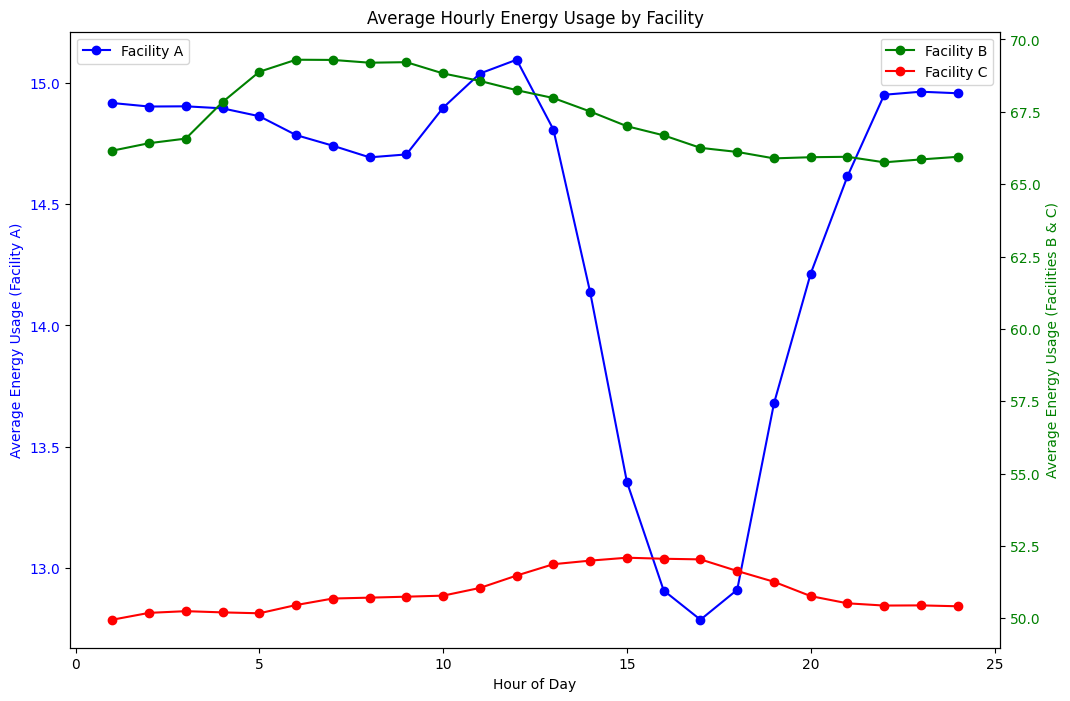

In [131]:
# Calculate average usage by hour for each facility
fa_avg = fa_long_df.groupby(fa_long_df['Hour']).mean()
fb_avg = fb_long_df.groupby(fb_long_df['Hour']).mean()
fc_avg = fc_long_df.groupby(fc_long_df['Hour']).mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot for fa_long_df on the primary y-axis
ax1.plot(fa_avg.index, fa_avg['MWh'], label='Facility A', color='blue', marker='o')

# Set labels for primary y-axis
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Energy Usage (Facility A)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for fb_long_df and fc_long_df
ax2 = ax1.twinx()

# Plot for fb_long_df and fc_long_df on the secondary y-axis
ax2.plot(fb_avg.index, fb_avg['MWh'], label='Facility B', color='green', marker='o')
ax2.plot(fc_avg.index, fc_avg['MWh'], label='Facility C', color='red', marker='o')

# Set labels for secondary y-axis
ax2.set_ylabel('Average Energy Usage (Facilities B & C)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legends
plt.title('Average Hourly Energy Usage by Facility')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



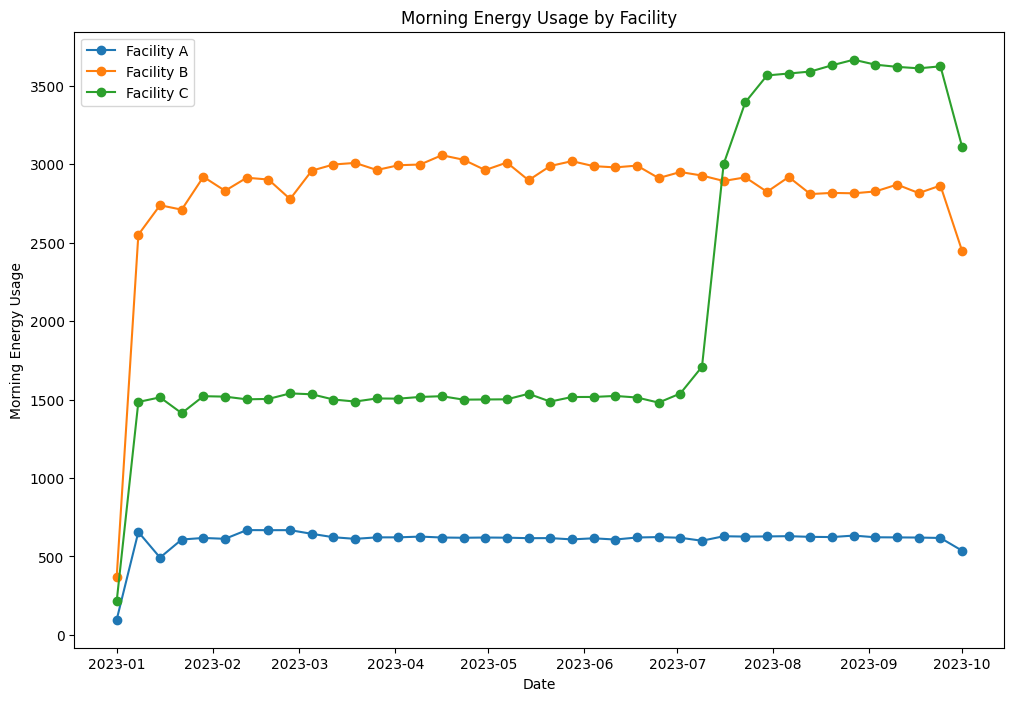

In [132]:
# Filter data for morning hours
a_morning = fa_long_df[fa_long_df['DayPart'] == 'Morning'].reset_index()
b_morning = fb_long_df[fb_long_df['DayPart'] == 'Morning'].reset_index()
c_morning = fc_long_df[fc_long_df['DayPart'] == 'Morning'].reset_index()


# Aggregate data by week
a_morning_agg = a_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
b_morning_agg = b_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
c_morning_agg = c_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)

    
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(a_morning_agg.index, a_morning_agg['MWh'], label='Facility A', marker='o')
plt.plot(b_morning_agg.index, b_morning_agg['MWh'], label='Facility B', marker='o')
plt.plot(c_morning_agg.index, c_morning_agg['MWh'], label='Facility C', marker='o')

plt.xlabel('Date')
plt.ylabel('Morning Energy Usage')
plt.title('Morning Energy Usage by Facility')
plt.legend()
plt.show()



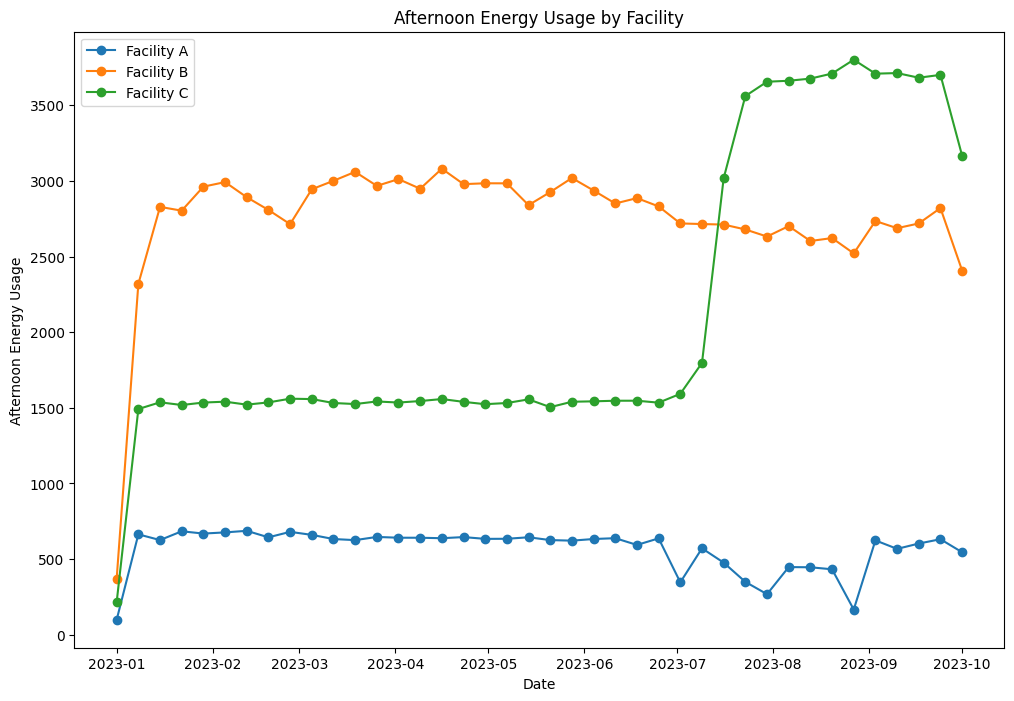

In [133]:
# Filter data for afternoon hours
a_morning = fa_long_df[fa_long_df['DayPart'] == 'Afternoon'].reset_index()
b_morning = fb_long_df[fb_long_df['DayPart'] == 'Afternoon'].reset_index()
c_morning = fc_long_df[fc_long_df['DayPart'] == 'Afternoon'].reset_index()


# Aggregate data by week
a_morning_agg = a_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
b_morning_agg = b_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
c_morning_agg = c_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)

    
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(a_morning_agg.index, a_morning_agg['MWh'], label='Facility A', marker='o')
plt.plot(b_morning_agg.index, b_morning_agg['MWh'], label='Facility B', marker='o')
plt.plot(c_morning_agg.index, c_morning_agg['MWh'], label='Facility C', marker='o')

plt.xlabel('Date')
plt.ylabel('Afternoon Energy Usage')
plt.title('Afternoon Energy Usage by Facility')
plt.legend()
plt.show()



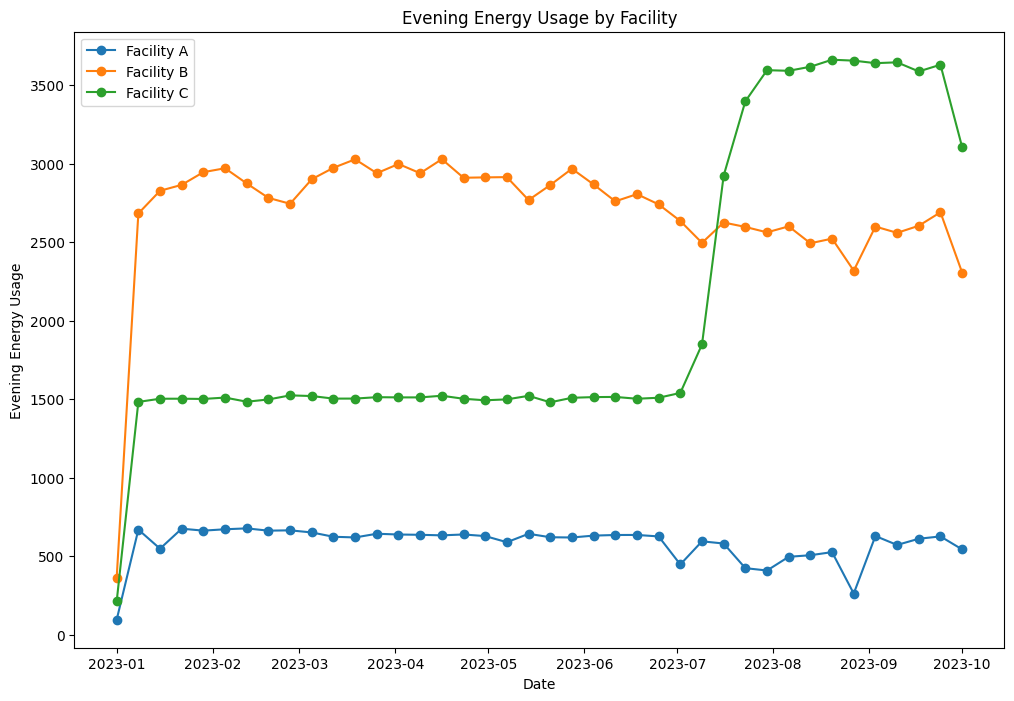

In [134]:
# Filter data for morning hours
a_morning = fa_long_df[fa_long_df['DayPart'] == 'Evening'].reset_index()
b_morning = fb_long_df[fb_long_df['DayPart'] == 'Evening'].reset_index()
c_morning = fc_long_df[fc_long_df['DayPart'] == 'Evening'].reset_index()


# Aggregate data by week
a_morning_agg = a_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
b_morning_agg = b_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
c_morning_agg = c_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)

    
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(a_morning_agg.index, a_morning_agg['MWh'], label='Facility A', marker='o')
plt.plot(b_morning_agg.index, b_morning_agg['MWh'], label='Facility B', marker='o')
plt.plot(c_morning_agg.index, c_morning_agg['MWh'], label='Facility C', marker='o')

plt.xlabel('Date')
plt.ylabel('Evening Energy Usage')
plt.title('Evening Energy Usage by Facility')
plt.legend()
plt.show()



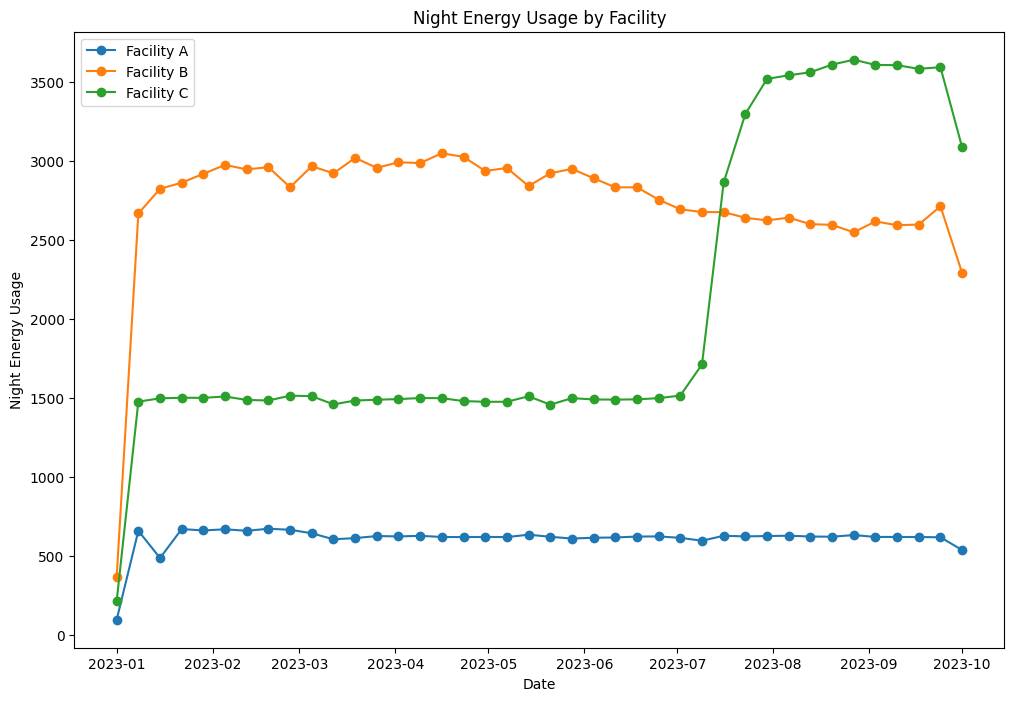

In [135]:
# Filter data for morning hours
a_morning = fa_long_df[fa_long_df['DayPart'] == 'Night'].reset_index()
b_morning = fb_long_df[fb_long_df['DayPart'] == 'Night'].reset_index()
c_morning = fc_long_df[fc_long_df['DayPart'] == 'Night'].reset_index()


# Aggregate data by week
a_morning_agg = a_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
b_morning_agg = b_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)
c_morning_agg = c_morning.groupby(pd.Grouper(key='Date', freq='W')).sum(numeric_only=True)

    
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(a_morning_agg.index, a_morning_agg['MWh'], label='Facility A', marker='o')
plt.plot(b_morning_agg.index, b_morning_agg['MWh'], label='Facility B', marker='o')
plt.plot(c_morning_agg.index, c_morning_agg['MWh'], label='Facility C', marker='o')

plt.xlabel('Date')
plt.ylabel('Night Energy Usage')
plt.title('Night Energy Usage by Facility')
plt.legend()
plt.show()



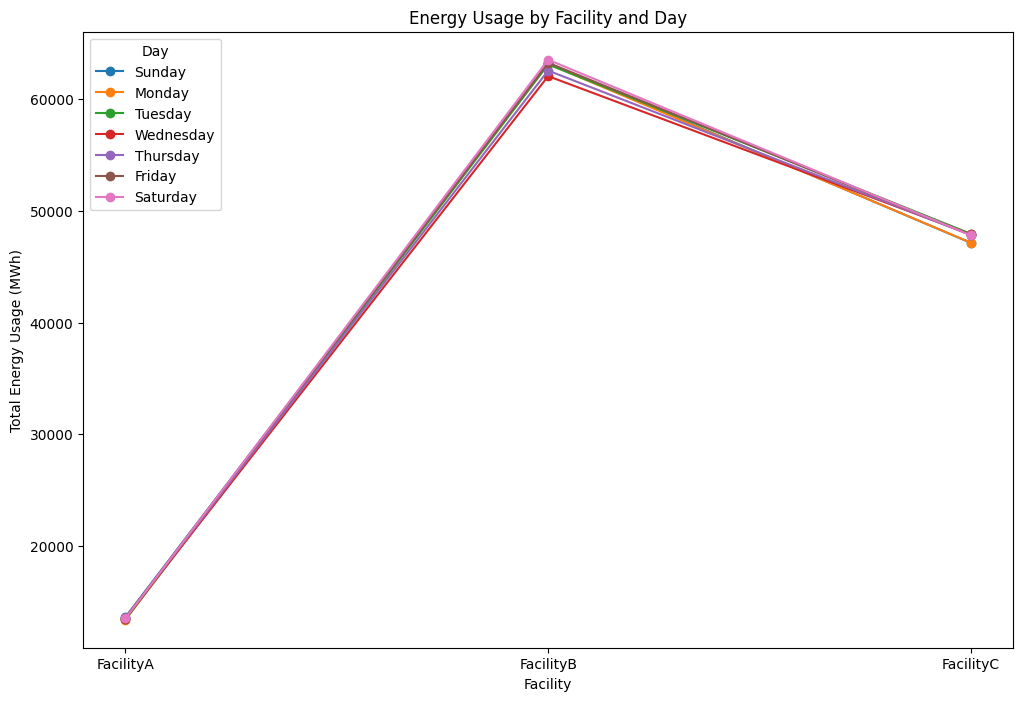

In [136]:
# let's see if there are any trends based on day-parts (morning, evening, etc.)
# Function to label day parts
fa_long_df.reset_index(inplace=True)
fb_long_df.reset_index(inplace=True)
fc_long_df.reset_index(inplace=True)

# Label day parts in each DataFrame
for df in [fa_long_df, fb_long_df, fc_long_df]:
    df['Day_Name'] = df['Date'].dt.day_name()
    df.set_index('Date', inplace=True)

# Aggregate data for each day part
def aggregate_day_name(df):
    return df.groupby('Day_Name')['MWh'].sum()

agg_a = aggregate_day_name(fa_long_df)
agg_b = aggregate_day_name(fb_long_df)
agg_c = aggregate_day_name(fc_long_df)

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

plt.figure(figsize=(12, 8))
for part in days:
    plt.plot(['FacilityA', 'FacilityB', 'FacilityC'], [agg_a.loc[part], agg_b.loc[part], agg_c.loc[part]], label=part, marker='o')

plt.xlabel('Facility')
plt.ylabel('Total Energy Usage (MWh)')
plt.title('Energy Usage by Facility and Day')
plt.legend(title='Day')
plt.show()

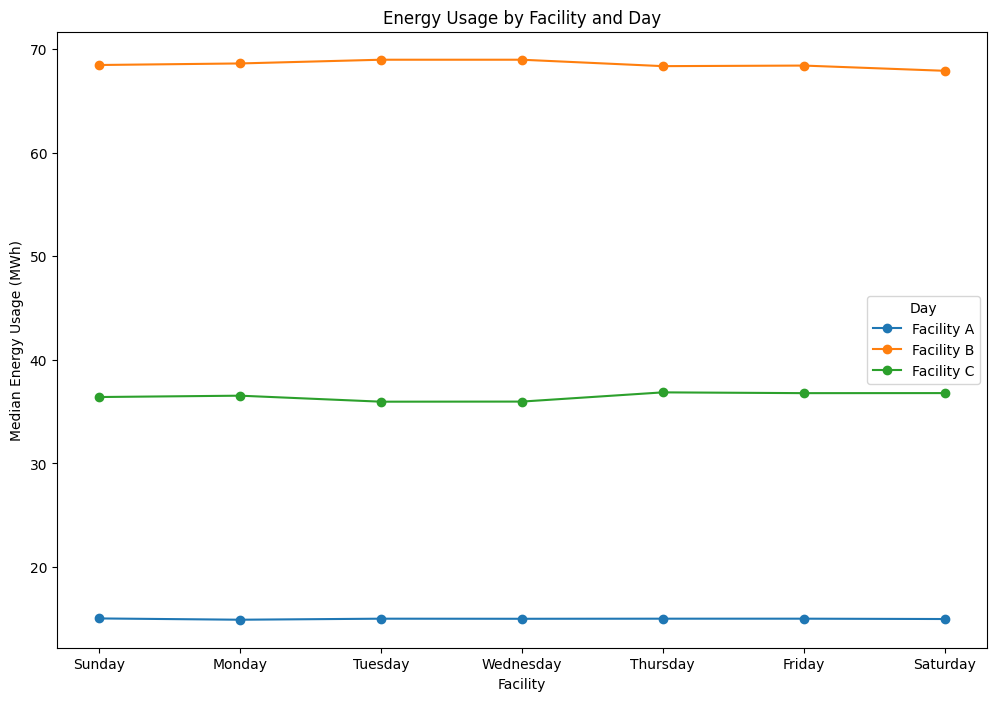

In [137]:
# let's see if there are any trends based on day-parts (morning, evening, etc.)
# Function to label day parts
fa_long_df.reset_index(inplace=True)
fb_long_df.reset_index(inplace=True)
fc_long_df.reset_index(inplace=True)

# Label day parts in each DataFrame
for df in [fa_long_df, fb_long_df, fc_long_df]:
    df['Day_Name'] = df['Date'].dt.day_name()
    df.set_index('Date', inplace=True)

# Aggregate data for each day part
def aggregate_day_name(df):
    return df.groupby('Day_Name')['MWh'].median()

agg_a = aggregate_day_name(fa_long_df)
agg_b = aggregate_day_name(fb_long_df)
agg_c = aggregate_day_name(fc_long_df)

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

plt.figure(figsize=(12, 8))

plt.plot(days, agg_a, label='Facility A', marker='o')
plt.plot(days, agg_b, label='Facility B', marker='o')
plt.plot(days, agg_c, label='Facility C', marker='o')
    
    
plt.xlabel('Facility')
plt.ylabel('Median Energy Usage (MWh)')
plt.title('Energy Usage by Facility and Day')
plt.legend(title='Day')
plt.show()

In [138]:
print(pivot_data)

Hour            1.0        2.0        3.0        4.0        5.0        6.0   \
Facility                                                                      
FacilityA  14.918121  14.903612  14.904489  14.896029  14.863601  14.785813   
FacilityB  66.157619  66.416007  66.575368  67.838828  68.884286  69.299780   
FacilityC  49.953590  50.190220  50.249412  50.207106  50.176044  50.460989   

Hour            7.0        8.0        9.0        10.0  ...       15.0  \
Facility                                               ...              
FacilityA  14.741916  14.693897  14.705978  14.898703  ...  13.354326   
FacilityB  69.292601  69.196850  69.215018  68.825897  ...  67.002784   
FacilityC  50.685971  50.716117  50.749267  50.785604  ...  52.095641   

Hour            16.0       17.0       18.0       19.0       20.0       21.0  \
Facility                                                                      
FacilityA  12.906421  12.785846  12.909300  13.678172  14.214432  14.615777   
F

In [139]:
print(agg_a)

Day_Name
Friday       15.0240
Monday       14.9000
Saturday     15.0000
Sunday       14.9910
Thursday     15.0000
Tuesday      15.0005
Wednesday    14.9675
Name: MWh, dtype: float64


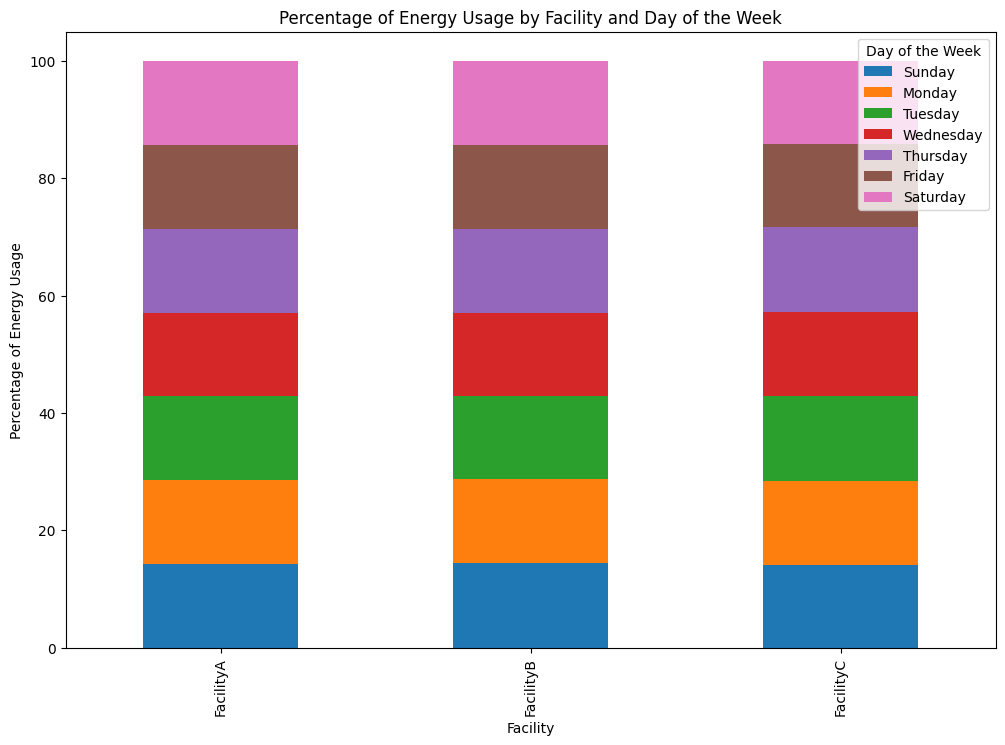

In [140]:
agg_a_df = agg_a.to_frame('MWh').reset_index()
agg_b_df = agg_b.to_frame('MWh').reset_index()
agg_c_df = agg_c.to_frame('MWh').reset_index()

# Combine data into one DataFrame
agg_a_df['Facility'] = 'FacilityA'
agg_b_df['Facility'] = 'FacilityB'
agg_c_df['Facility'] = 'FacilityC'
combined_data = pd.concat([agg_a_df, agg_b_df, agg_c_df])

# Pivot the data for the stacked bar chart
pivot_data = combined_data.pivot(index='Facility', columns='Day_Name', values='MWh')

numeric_columns = pivot_data.select_dtypes(include=np.number).columns
pivot_data_numeric = pivot_data[numeric_columns]

# Perform the division operation on numeric columns only
pivot_data_percentage = pivot_data_numeric.div(pivot_data_numeric.sum(axis=1), axis=0) * 100
pivot_data_ordered = pivot_data_percentage.reindex(columns=days)

# Plotting
pivot_data_ordered.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Facility')
plt.ylabel('Percentage of Energy Usage')
plt.title('Percentage of Energy Usage by Facility and Day of the Week')
plt.legend(title='Day of the Week')
plt.show()


/var/folders/sl/w_zvvxs11rs1k9qdjf6zsqk40000gr/T/ipykernel_52445/1355943129.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fa_avg = fa_long_df.groupby('DayOfWeek').mean()
/var/folders/sl/w_zvvxs11rs1k9qdjf6zsqk40000gr/T/ipykernel_52445/1355943129.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fb_avg = fb_long_df.groupby('DayOfWeek').mean()
/var/folders/sl/w_zvvxs11rs1k9qdjf6zsqk40000gr/T/ipykernel_52445/1355943129.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or 

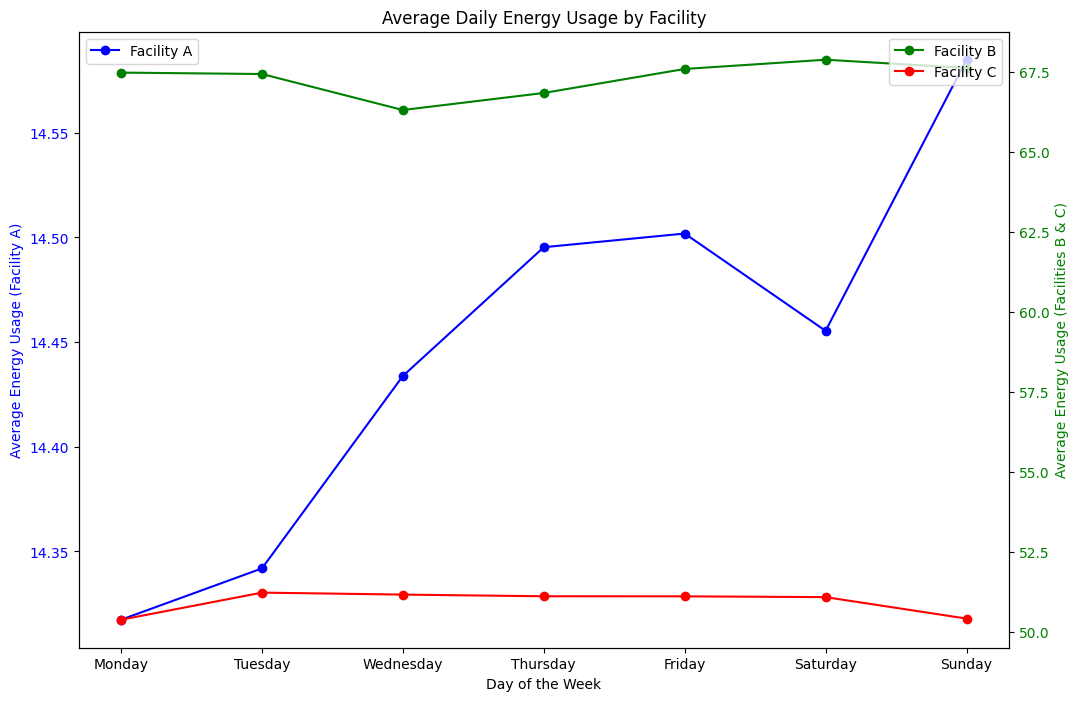

In [141]:
fa_long_df.reset_index(inplace=True)
fb_long_df.reset_index(inplace=True)
fc_long_df.reset_index(inplace=True)

# Calculate average usage by day of the week for each facility
fa_long_df['DayOfWeek'] = fa_long_df['Date'].dt.day_name()
fb_long_df['DayOfWeek'] = fb_long_df['Date'].dt.day_name()
fc_long_df['DayOfWeek'] = fc_long_df['Date'].dt.day_name()

fa_avg = fa_long_df.groupby('DayOfWeek').mean()
fb_avg = fb_long_df.groupby('DayOfWeek').mean()
fc_avg = fc_long_df.groupby('DayOfWeek').mean()

# Define the correct order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fa_avg = fa_avg.reindex(day_order)
fb_avg = fb_avg.reindex(day_order)
fc_avg = fc_avg.reindex(day_order)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot for fa_long_df on the primary y-axis
ax1.plot(fa_avg.index, fa_avg['MWh'], label='Facility A', color='blue', marker='o')

# Set labels for primary y-axis
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Energy Usage (Facility A)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for fb_long_df and fc_long_df
ax2 = ax1.twinx()

# Plot for fb_long_df and fc_long_df on the secondary y-axis
ax2.plot(fb_avg.index, fb_avg['MWh'], label='Facility B', color='green', marker='o')
ax2.plot(fc_avg.index, fc_avg['MWh'], label='Facility C', color='red', marker='o')

# Set labels for secondary y-axis
ax2.set_ylabel('Average Energy Usage (Facilities B & C)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legends
plt.title('Average Daily Energy Usage by Facility')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



## Water and Gas Usage

In [142]:
gas_water.head()

,date,facility,water_gallons,naturalgas_therms
0,01-01-2023,FacilityA,724500,293.0
1,01-01-2023,FacilityB,74,3.0
2,01-01-2023,FacilityC,2800,40.0
3,02-01-2023,FacilityA,1597500,297.0
4,02-01-2023,FacilityB,115,5.0


In [143]:
print(pivot_water)

facility    FacilityA  FacilityB  FacilityC
date                                       
01-01-2023     724500         74       2800
02-01-2023    1597500        115       2900
03-01-2023    1553800        105       4000
04-01-2023    1733460         95       4600
05-01-2023    2585100        191       4600
06-01-2023    3096100        402       6000
07-01-2023    2637400        627       6800
08-01-2023    2559300        763       5400
09-01-2023    2340444        986       4800


FacilityA - Slope: 214650.2666666667, R-squared: 0.6338065691268944
FacilityB - Slope: 115.71666666666668, R-squared: 0.8625736239154287
FacilityC - Slope: 375.00000000000006, R-squared: 0.6051761236850496


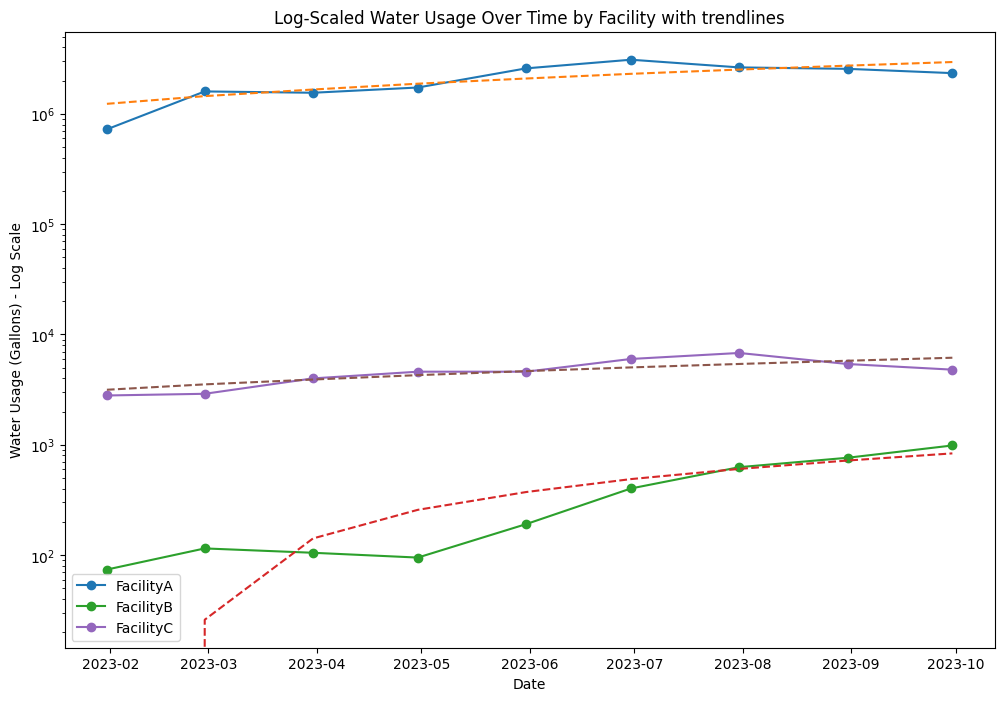

In [144]:
# Pivot data for plotting
pivot_water = gas_water.pivot_table(index='date', columns='facility', values='water_gallons', aggfunc='sum')

# Plot for each facility with log scale
fig, ax = plt.subplots(figsize=(12, 8))

facilities = ['FacilityA', 'FacilityB', 'FacilityC']
#for facility in facilities:
#    ax.plot(pivot_water.index, pivot_water[facility], label=facility, marker='o')

    
# Function to plot trendline and print statistics
def plot_trendline_and_print_stats(ax, data, label):
    x = np.arange(len(data))
    y = data.values
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = intercept + slope * x
    ax.plot(data.index, y, label=label, marker='o', )
    ax.plot(data.index, trendline, linestyle='--')
    print(f"{label} - Slope: {slope}, R-squared: {r_value**2}")

for facility in facilities:
    plot_trendline_and_print_stats(ax, pivot_water_monthly[facility], facility)
    
ax.set_xlabel('Date')
ax.set_ylabel('Water Usage (Gallons) - Log Scale')
ax.set_yscale('log')
plt.title('Log-Scaled Water Usage Over Time by Facility with trendlines')
plt.legend()
plt.show()



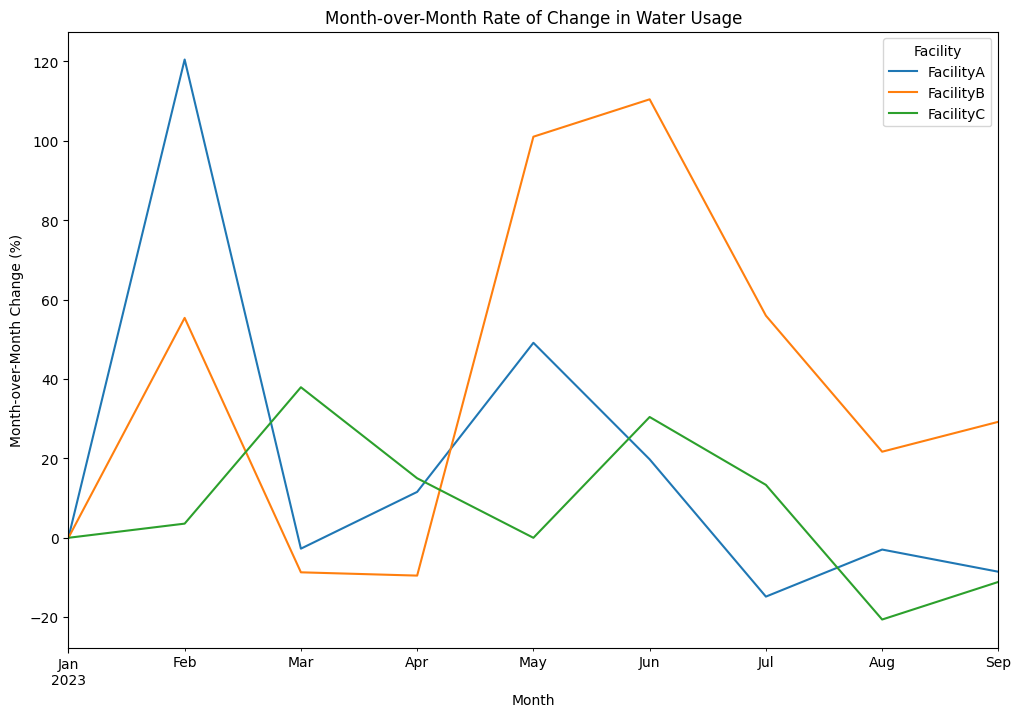

Month-over-Month Rate of Change (%)
facility     FacilityA   FacilityB  FacilityC
date                                         
2023-01-31    0.000000    0.000000   0.000000
2023-02-28  120.496894   55.405405   3.571429
2023-03-31   -2.735524   -8.695652  37.931034
2023-04-30   11.562621   -9.523810  15.000000
2023-05-31   49.129487  101.052632   0.000000
2023-06-30   19.767127  110.471204  30.434783
2023-07-31  -14.815413   55.970149  13.333333
2023-08-31   -2.961250   21.690590 -20.588235
2023-09-30   -8.551401   29.226737 -11.111111


In [145]:
#gas_water.reset_index(inplace=True)
gas_water['date'] = pd.to_datetime(gas_water['date'])

# Set 'Date' as the index
#daily_grid.set_index('date', inplace=True)


# Pivot data for monthly aggregation
pivot_water_monthly = gas_water.pivot_table(index=pd.Grouper(key='date', freq='M'), columns='facility', values='water_gallons', aggfunc='sum')

# Calculate month-over-month percentage change
mom_change = pivot_water_monthly.pct_change().fillna(0) * 100

# Plotting
mom_change.plot(figsize=(12, 8))
plt.xlabel('Month')
plt.ylabel('Month-over-Month Change (%)')
plt.title('Month-over-Month Rate of Change in Water Usage')
plt.legend(title='Facility')
plt.show()

# Displaying the table
print("Month-over-Month Rate of Change (%)")
print(mom_change)



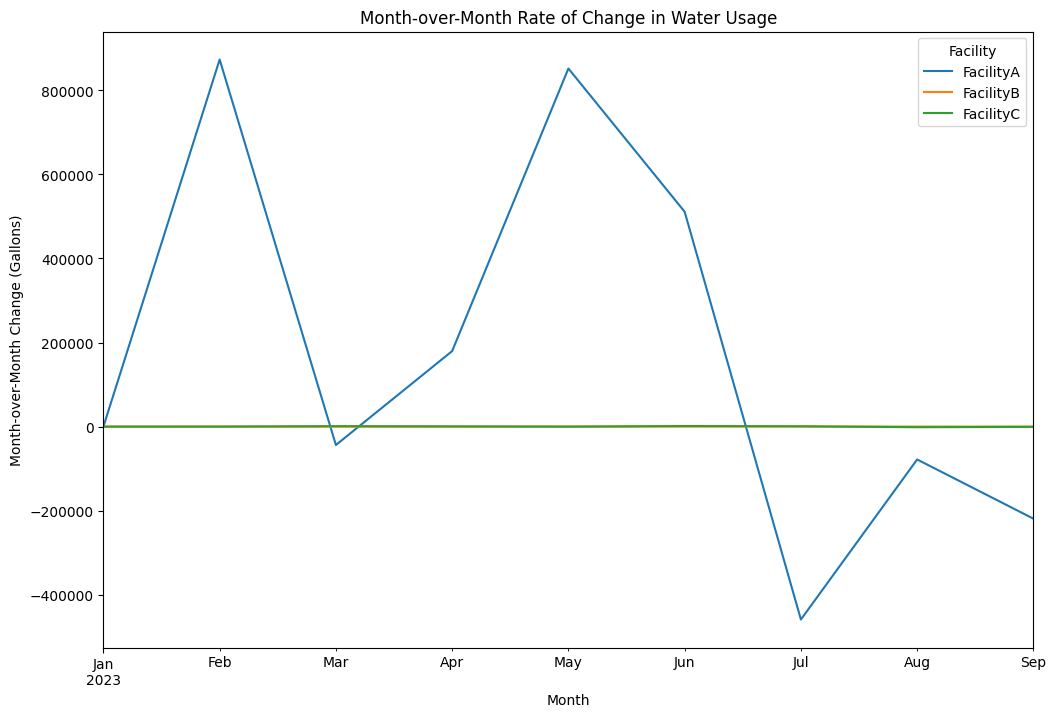

Month-over-Month Rate of Change (Gallons)
facility    FacilityA  FacilityB  FacilityC
date                                       
2023-01-31        0.0        0.0        0.0
2023-02-28   873000.0       41.0      100.0
2023-03-31   -43700.0      -10.0     1100.0
2023-04-30   179660.0      -10.0      600.0
2023-05-31   851640.0       96.0        0.0
2023-06-30   511000.0      211.0     1400.0
2023-07-31  -458700.0      225.0      800.0
2023-08-31   -78100.0      136.0    -1400.0
2023-09-30  -218856.0      223.0     -600.0


In [146]:
#gas_water.reset_index(inplace=True)
gas_water['date'] = pd.to_datetime(gas_water['date'])

# Set 'Date' as the index
#daily_grid.set_index('date', inplace=True)


# Pivot data for monthly aggregation
#pivot_water_monthly = gas_water.pivot_table(index=pd.Grouper(key='date', freq='M'), columns='facility', values='water_gallons', aggfunc='sum')

# Calculate month-over-month percentage change
mom_change = pivot_water_monthly.diff().fillna(0)

# Plotting
mom_change.plot(figsize=(12, 8))
plt.xlabel('Month')
plt.ylabel('Month-over-Month Change (Gallons)')
plt.title('Month-over-Month Rate of Change in Water Usage')
plt.legend(title='Facility')
plt.show()

# Displaying the table
print("Month-over-Month Rate of Change (Gallons)")
print(mom_change)

FacilityA - Slope: -8.75, R-squared: 0.031949063870694544
FacilityB - Slope: 3.065, R-squared: 0.8134701977197285
FacilityC - Slope: 1.9316666666666658, R-squared: 0.1869871804389867


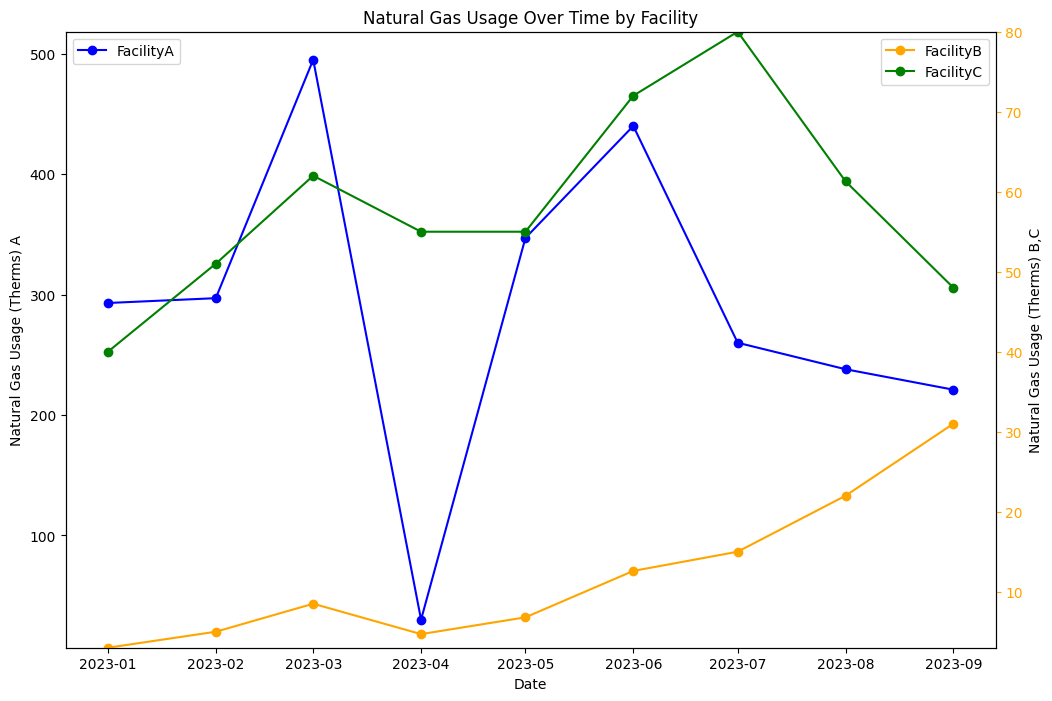

In [147]:
# Pivot data for plotting
pivot_gas = gas_water.pivot_table(index='date', columns='facility', values='naturalgas_therms', aggfunc='sum')

# Plot for each facility with log scale
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

facilities = ['FacilityA', 'FacilityB', 'FacilityC']
#for facility in facilities:
#    ax.plot(pivot_water.index, pivot_water[facility], label=facility, marker='o')

    
# Function to plot trendline and print statistics
def plot_trendline_and_print_stats(ax, data, label,c):
    x = np.arange(len(data))
    y = data.values
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #trendline = intercept + slope * x
    ax.plot(data.index, y, label=label, marker='o', color=c)
    #ax.plot(data.index, trendline, linestyle='--')
    print(f"{label} - Slope: {slope}, R-squared: {r_value**2}")

plot_trendline_and_print_stats(ax1, pivot_gas['FacilityA'], 'FacilityA','blue')
plot_trendline_and_print_stats(ax2, pivot_gas['FacilityB'], 'FacilityB','orange')
plot_trendline_and_print_stats(ax2, pivot_gas['FacilityC'], 'FacilityC','green')
    
ax1.set_xlabel('Date')
ax1.set_ylabel('Natural Gas Usage (Therms) A')

ax2.set_ylim([min(pivot_gas['FacilityB']), max(pivot_gas['FacilityC'])])
ax2.set_ylabel('Natural Gas Usage (Therms) B,C', color='black')
ax2.tick_params(axis='y', colors='orange')

ax2.legend(loc='upper right')
ax1.legend(loc='upper left')

plt.title('Natural Gas Usage Over Time by Facility')
plt.legend()
plt.show()

In [148]:
correlation = pivot_gas['FacilityA'].corr(pivot_gas['FacilityC'], method='spearman')
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.31799441532717476


# Add Metrics to Facilities Dataframe

* CFE Score - Total GA Sites = (energy ABC) * fossil free %
* SUM CFE Score = (energy ABC) * fossil free % / (energy ABC) * 100
* FacailityA Hourly Matched (MWh)	= energy A * fossil free %
* 24/7 CFE Score"	"FacilityA
* 24/7 Avoided Emissions
* (mt CO2e)"	FacailityB Hourly Matched (MWh)	"FacilityB 
* 24/7 CFE Score"	"FacilityB
* 24/7 Avoided Emissions
* (mt CO2e)"	FacailityC Hourly Matched (MWh)	"FacilityC 
* 24/7 CFE Score"	"FacilityC
* 24/7 Avoided Emissions
* (mt CO2e)"	SUM Avoided Emissions

In [179]:
combined_data = pd.concat([fa_long_df, fb_long_df, fc_long_df])
h_adj = combined_data['Hour']-1                                  
combined_data['Datetime'] = pd.to_datetime(combined_data['Date'].dt.strftime('%Y-%m-%d') + ' ' + h_adj.astype(int).astype(str) + ':00')

combined_data.head()

,Date,index,Hour,kWh,MWh,DayPart,Facility,Day_Name,DayOfWeek,Datetime
0,2023-01-01,0,1.0,"16,028.00",16.03,Night,FacilityA,Sunday,Sunday,2023-01-01 00:00:00
1,2023-01-01,1,2.0,"16,161.00",16.16,Night,FacilityA,Sunday,Sunday,2023-01-01 01:00:00
2,2023-01-01,2,3.0,"16,203.00",16.20,Night,FacilityA,Sunday,Sunday,2023-01-01 02:00:00
3,2023-01-01,3,4.0,"16,181.00",16.18,Night,FacilityA,Sunday,Sunday,2023-01-01 03:00:00
4,2023-01-01,4,5.0,"16,132.00",16.13,Night,FacilityA,Sunday,Sunday,2023-01-01 04:00:00


In [191]:
# calculate hourly metrics for each facility

# Step 1: Calculate TotalEnergy and fossilFreeEnergy in grid_mixes_long_df
energy_sources = ['Nuclear', 'Coal', 'Wind', 'Solar', 'Hydro', 'Gas', 'Oil', 'Unknown']
grid_mixes_long_df['TotalEnergyProduced'] = grid_mixes_long_df[energy_sources].sum(axis=1)
grid_mixes_long_df['fossilFreeEnergyProduced'] = grid_mixes_long_df['TotalEnergyProduced'] * grid_mixes_long_df['fossilFreePercentage'] / 100


# Step 2: Merge the DataFrames
combined_data['Datetime'] = pd.to_datetime(combined_data['Datetime'])
grid_mixes_long_df['Datetime'] = pd.to_datetime(grid_mixes_long_df['Datetime'])
energy_df = pd.merge(combined_data, grid_mixes_long_df[['Datetime', 'TotalEnergyProduced', 'fossilFreePercentage', 'fossilFreeEnergyProduced','AOER']], on='Datetime')

energy_df['MatchedMWh'] = energy_df['MWh']*energy_df['fossilFreePercentage']/100
energy_df['CFEScore'] = (energy_df['MatchedMWh']+((energy_df['MWh']-energy_df['MatchedMWh'])*(energy_df['fossilFreePercentage']/100)))/energy_df['MWh']*100
energy_df['AvoidedEmissions'] = energy_df['MatchedMWh']*energy_df['AOER']/1000 #Convert AOER to mt/MWh

energy_df.head()

,Date,index,Hour,kWh,MWh,DayPart,Facility,Day_Name,DayOfWeek,Datetime,TotalEnergyProduced,fossilFreePercentage,fossilFreeEnergyProduced,AOER,MatchedMWh,CFEScore,AvoidedEmissions
0,2023-01-01,0,1.0,"16,028.00",16.03,Night,FacilityA,Sunday,Sunday,2023-01-01 00:00:00,1338.0,33.0,441.54,348.0,5.2899,55.11,1.840885
1,2023-01-01,0,1.0,61240.0,61.24,Night,FacilityB,Sunday,Sunday,2023-01-01 00:00:00,1338.0,33.0,441.54,348.0,20.2092,55.11,7.032802
2,2023-01-01,0,1.0,35670.0,35.67,Night,FacilityC,Sunday,Sunday,2023-01-01 00:00:00,1338.0,33.0,441.54,348.0,11.7711,55.11,4.096343
3,2023-01-01,1,2.0,"16,161.00",16.16,Night,FacilityA,Sunday,Sunday,2023-01-01 01:00:00,1355.0,33.0,447.15,349.0,5.3328,55.11,1.861147
4,2023-01-01,1,2.0,61230.0,61.23,Night,FacilityB,Sunday,Sunday,2023-01-01 01:00:00,1355.0,33.0,447.15,349.0,20.2059,55.11,7.051859


In [196]:

# Step 3: Aggregate by Date and Hour
agg_energy_df = merged_df.groupby(['Datetime']).agg({'MWh' : 'sum'}).reset_index()
agg_energy_merged_df = pd.merge(agg_energy_df, grid_mixes_long_df[['Datetime', 'TotalEnergyProduced', 'fossilFreePercentage', 'fossilFreeEnergyProduced','AOER']], on='Datetime')

# Step 4: Calculate Metrics
agg_energy_merged_df['CFEScore'] = agg_energy_merged_df['MWh']*agg_energy_merged_df['fossilFreePercentage']/100
agg_energy_merged_df['SUMCFEScore'] = agg_energy_merged_df['CFEScore']/agg_energy_merged_df['MWh']*100

agg_energy_merged_df.head()

,Datetime,MWh,TotalEnergyProduced,fossilFreePercentage,fossilFreeEnergyProduced,AOER,CFEScore,SUMCFEScore
0,2023-01-01 00:00:00,112.94,1338.0,33.0,441.54,348.0,37.2702,33.0
1,2023-01-01 01:00:00,113.20,1355.0,33.0,447.15,349.0,37.3560,33.0
2,2023-01-01 02:00:00,113.27,1282.0,32.0,410.24,354.0,36.2464,32.0
3,2023-01-01 03:00:00,113.49,1238.0,31.0,383.78,358.0,35.1819,31.0
4,2023-01-01 04:00:00,113.16,1170.0,31.0,362.70,362.0,35.0796,31.0


# Facilities Scope 2 Emissions

In [260]:
fossil_free_energy.head()

Facility,FacilityA,FacilityB,FacilityC
Date,,,
2023-01-01,137.0759,517.4076,301.9445
2023-01-08,1007.1908,3899.1516,2252.5897
2023-01-15,828.6064,4187.6352,2252.8551
2023-01-22,893.2589,3788.5534,2004.9034
2023-01-29,874.8749,3925.4968,2021.6487


TypeError: unsupported operand type(s) for -: 'DatetimeArray' and 'float'

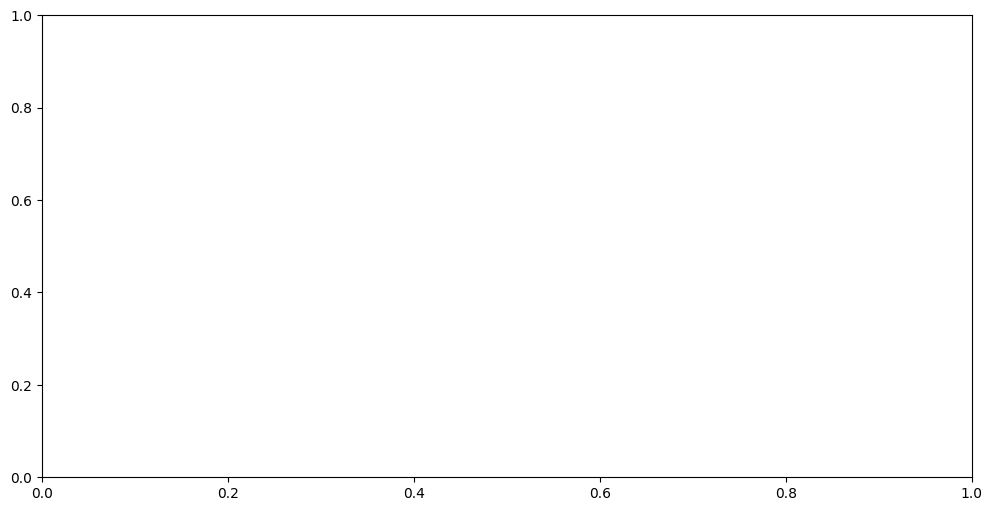

In [263]:
# Monthly MWh associated to carbon-producing sources (MWh - MatchedMWh)

facilities = ['FacilityA', 'FacilityB', 'FacilityC']

# Pivot data for monthly aggregation
pivot_energy_monthly = energy_df.pivot_table(index=pd.Grouper(key='Date', freq='W'), 
                                                        columns='Facility', 
                                                        values=['MWh', 'MatchedMWh', 'AvoidedEmissions'], 
                                                        aggfunc='sum')


fossil_free_energy = pivot_energy_monthly['MatchedMWh']
total_energy =  pivot_energy_monthly['MWh']
carbon_emitting_energy = pivot_energy_monthly['MWh'] - pivot_energy_monthly['MatchedMWh']

# Calculate totals
total_avoided_emissions = pivot_energy_monthly['AvoidedEmissions'].sum(axis=1)  # Sum across all facilities for each month

for facility in facilities:
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Stacked bar chart for fossil_free_energy and carbon_emitting_energy
    ax1.bar(fossil_free_energy.index, fossil_free_energy[facility], label='Fossil Free MWh', color='darkseagreen')
    ax1.bar(carbon_emitting_energy.index, carbon_emitting_energy[facility], bottom=fossil_free_energy[facility], 
            label='Carbon Emitting MWh', color='sienna')

    # Setting labels and titles for primary y-axis
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Energy Usage (MWh)')
    ax1.set_title(f'Energy Usage and Avoided Emissions - {facility}')
    ax1.legend(loc='upper left')

    # Plotting AvoidedEmissions on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(pivot_energy_monthly['AvoidedEmissions'].index, pivot_energy_monthly['AvoidedEmissions'][facility], 
             label='Avoided Emissions', color='dimgrey', marker='o')
    ax2.set_ylabel('Avoided Emissions (Metric Tons)')
    ax2.legend(loc='upper right')

fig, ax = plt.subplots(figsize=(12, 6))
# Adjusting x-coordinates for side-by-side bars
index = np.arange(len(total_carbon_emitting_mwh.index))
ax.bar(index - bar_width/2, total_carbon_emitting_mwh, bar_width, label='Carbon Emitting MWh', color='sienna')
ax.bar(index + bar_width/2,total_matched_mwh, bar_width, label='Fossil Free MWh', color='darkseagreen')
#ax.plot(index, total_mwh, label='Total Energy', color='dimgrey', marker='o')
ax.plot(index, total_mwh, label='Total Energy', color='dimgrey', marker='o')

ax.set_xlabel('Month')
ax.set_ylabel('Energy Usage (MWh)')
ax.set_title(f'Energy Usage by Month - All Facilities')
#ax.set_xticks(index)
#ax.set_xticklabels(total_carbon_emitting_mwh.index.strftime('%b %Y'))
ax.legend()    
    
plt.show()

# Avoided Emissions

In [226]:
print(avoided_emissions['FacilityA'])

Date
2023-01-31    1333.266600
2023-02-28    1280.925266
2023-03-31    1316.512304
2023-04-30    1043.865797
2023-05-31     924.876576
2023-06-30    1281.825937
2023-07-31     963.997754
2023-08-31     961.749474
2023-09-30    1151.498987
Freq: M, Name: FacilityA, dtype: float64


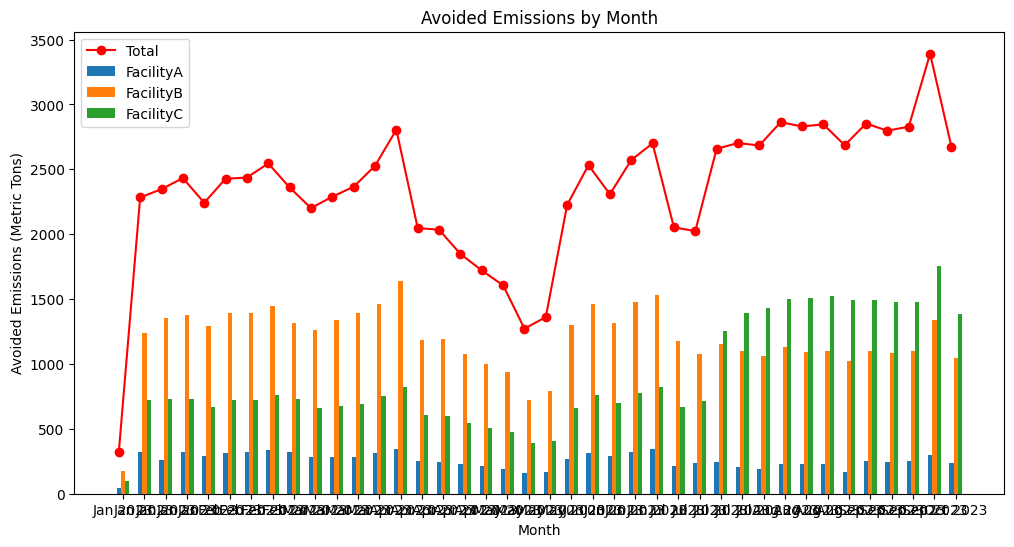

In [254]:
# Monthly MWh associated to carbon-producing sources (MWh - MatchedMWh)

facilities = ['FacilityA', 'FacilityB', 'FacilityC']

# Pivot data for monthly aggregation
pivot_avoided_monthly = energy_df.pivot_table(index=pd.Grouper(key='Date', freq='W'), 
                                                        columns='Facility', 
                                                        values=['AvoidedEmissions'], 
                                                        aggfunc='sum')


# Select the 'AvoidedEmissions' part of the pivot table
avoided_emissions = pivot_energy_monthly['AvoidedEmissions']

# Sum 'AvoidedEmissions' across all facilities for each month
monthly_totals_avoided_emissions = avoided_emissions.sum(axis=1)

# Width of the bars
bar_width = 0.2

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Creating an index for side-by-side bars
index = np.arange(len(avoided_emissions.index))

# Plotting the bars for each facility and total
for i, facility in enumerate(facilities):
    ax.bar(index + i*bar_width, avoided_emissions[facility], bar_width, label=facility)

    
ax.plot(index, monthly_totals_avoided_emissions, label='Total', color='red', marker='o')

# Setting labels and titles
ax.set_xlabel('Month')
ax.set_ylabel('Avoided Emissions (Metric Tons)')
ax.set_title('Avoided Emissions by Month')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(avoided_emissions.index.strftime('%b %Y'))
ax.legend()

plt.show()

# CFE Score
CFE Score is in a given time period the percentage of 
* Original formula: =iferror((N5+((D5-N5)*H5))/D5*100,0)
* Expanded =iferror((D5*H5+((D5-D5*H5)*H5))/D5*100,0)
* minus rows and error =(D*H+((D-D*H)*H))/D*100
* simplify =(DH+((D-DH)H))/D*100
* simplify =(DH+DH(1-H))/D*100
* simplify cancel D = (H+((1-H)H))*100
* simplify = H+H(1-H) - just the percentage (for readability)
* simplify = H(1+(1-H))
* H = fossil free percentage for the grid
* then simply the formula is (fossil free pct)*(1+carbon emitted pct)


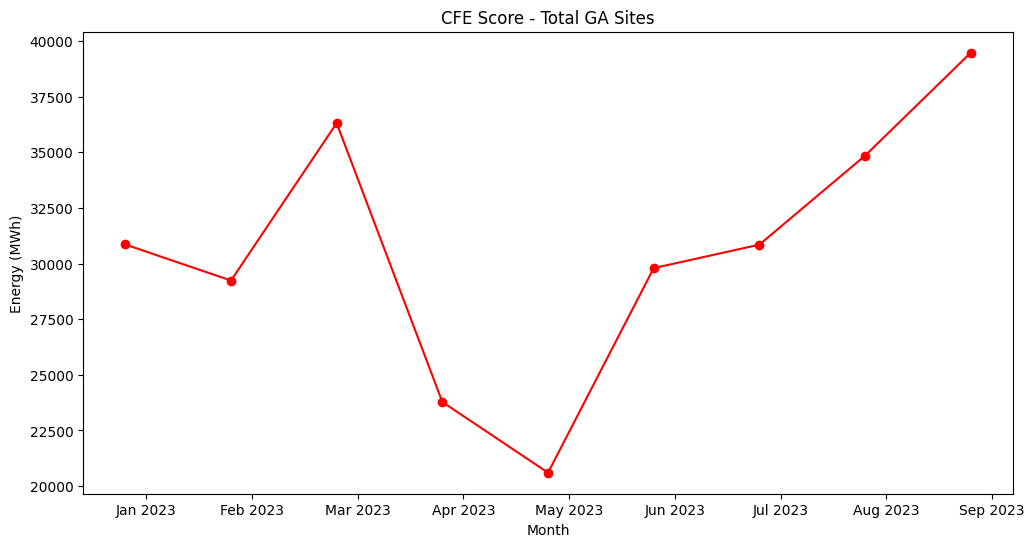

In [237]:
# plot the CFE Score - Total GA Sites (proportionate MWh across all three facilities that are fossil fuel)

# agg_energy_merged_df # hourly energy data across all facilities
pivot = agg_energy_merged_df.pivot_table(index=pd.Grouper(key='Datetime', freq='M'),  
                                                        values=['CFEScore'], 
                                                        aggfunc='sum')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Creating an index for side-by-side bars
index = np.arange(len(pivot.index))

ax.plot(index, pivot['CFEScore'], color='red', marker='o')

# Setting labels and titles
ax.set_xlabel('Month')
ax.set_ylabel('Energy (MWh)')
ax.set_title('CFE Score - Total GA Sites')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pivot.index.strftime('%b %Y'))

plt.show()

In [241]:
# Facility 24/7 CFE Score
agg_energy_merged_df['FacilityCFE'] = agg_energy_merged_df['fossilFreePercentage']*(1+(1-(agg_energy_merged_df['fossilFreePercentage']/100)))
agg_energy_merged_df.head()

,Datetime,MWh,TotalEnergyProduced,fossilFreePercentage,fossilFreeEnergyProduced,AOER,CFEScore,SUMCFEScore,FacilityCFE
0,2023-01-01 00:00:00,112.94,1338.0,33.0,441.54,348.0,37.2702,33.0,55.11
1,2023-01-01 01:00:00,113.20,1355.0,33.0,447.15,349.0,37.3560,33.0,55.11
2,2023-01-01 02:00:00,113.27,1282.0,32.0,410.24,354.0,36.2464,32.0,53.76
3,2023-01-01 03:00:00,113.49,1238.0,31.0,383.78,358.0,35.1819,31.0,52.39
4,2023-01-01 04:00:00,113.16,1170.0,31.0,362.70,362.0,35.0796,31.0,52.39


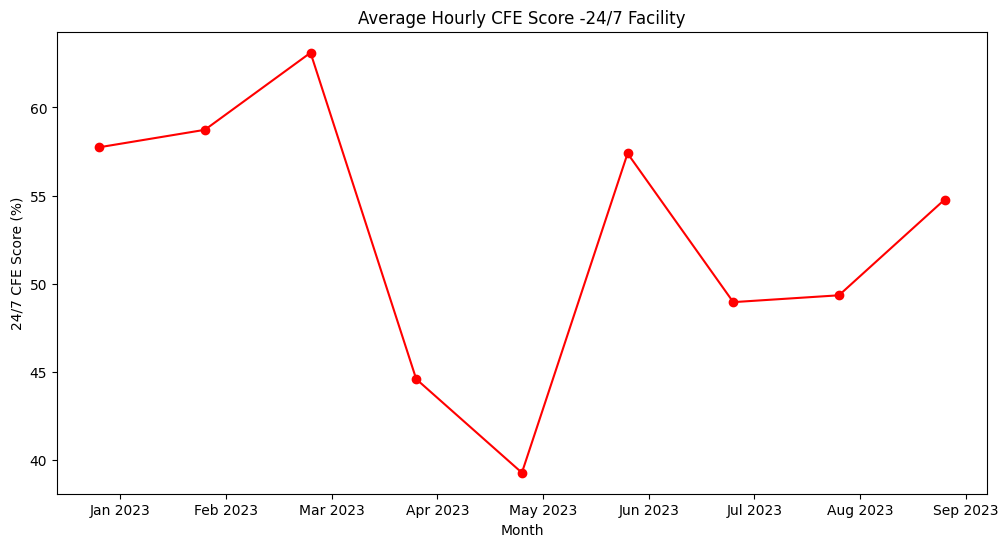

In [245]:
# plot the individual facility 24/7 CFE Score
# (fossil free pct)*(1+carbon emitted pct)
# agg_energy_merged_df # hourly energy data across all facilities
pivot = agg_energy_merged_df.pivot_table(index=pd.Grouper(key='Datetime', freq='M'),  
                                                        values=['FacilityCFE'], 
                                                        aggfunc='mean')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Creating an index for side-by-side bars
index = np.arange(len(pivot.index))

ax.plot(index, pivot['FacilityCFE'], color='red', marker='o')

# Setting labels and titles
ax.set_xlabel('Month')
ax.set_ylabel('24/7 CFE Score (%)')
ax.set_title('Average Hourly CFE Score -24/7 Facility')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pivot.index.strftime('%b %Y'))

plt.show()